<a href="https://colab.research.google.com/github/Sage1ll1001/TD_ML/blob/main/A9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Deforestation Issue Analysis Using Support Vector Machine (SVM)

---

##  Navigation Guide

| Phase | Step | Cell # | Description |
|-------|------|--------|-------------|
| **Phase 1** | Step 1 | Cell 1 | Import Libraries |
| **Phase 1** | Step 2 | Cell 2 | Load Dataset & Initial Exploration |
| **Phase 1** | Step 3 | Cell 3 | EDA — Distributions, Correlations, Country Trends |
| **Phase 1** | Step 4 | Cell 4 | Outlier Detection & Handling |
| **Phase 1** | Step 5 | Cell 5 | Data Cleaning & Encoding |
| **Phase 1** | Step 6 | Cell 6 | Feature Engineering & Target Variable Creation |
| **Phase 1** | Step 7 | Cell 7 | Feature Scaling & Train/Test Split |
| **Phase 2** | Step 8 | Cell 8 | SVM — Linear Kernel (Baseline) |
| **Phase 2** | Step 9 | Cell 9 | SVM — Evaluation Metrics & Confusion Matrix |
| **Phase 2** | Step 10 | Cell 10 | SVM — Polynomial & RBF Kernels Comparison |
| **Phase 2** | Step 11 | Cell 11 | SVM — GridSearchCV Hyperparameter Tuning |
| **Phase 2** | Step 12 | Cell 12 | SVM — Cross-Validation & Robustness Analysis |
| **Phase 2** | Step 13 | Cell 13 | SVM — Decision Boundary Visualization (PCA 2D) |
| **Phase 3** | Step 14 | Cell 14 | Feature Importance via Permutation + LinearSVC Weights |
| **Phase 3** | Step 15 | Cell 15 | Feature Analysis — Detailed Interpretation |
| **Phase 4** | Step 16 | Cell 16 | Advanced Visualizations — Relationships & Trends |
| **Phase 4** | Step 17 | Cell 17 | Country-Level Analysis & Regional Insights |
| **Phase 4** | Step 18 | Cell 18 | Policy Recommendations & Final Report |

>  **All plots generated inline via code — no pre-downloaded images.**

---
#  PHASE 1 — Data Preprocessing

##  Cell 1 | Step 1 — Import Libraries

In [1]:
#  PHASE 1 | STEP 1 : Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import (train_test_split, cross_val_score,
                                     StratifiedKFold, GridSearchCV)
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import (accuracy_score, confusion_matrix,
                              classification_report, ConfusionMatrixDisplay,
                              roc_curve, auc, roc_auc_score)
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy import stats

plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 11
sns.set_style('whitegrid')
np.random.seed(42)

print(" All libraries imported successfully!")

 All libraries imported successfully!


##  Cell 2 | Step 2 — Load Dataset & Initial Exploration

In [2]:
#  PHASE 1 | STEP 2 : Load & explore dataset
df = pd.read_csv('deforestation_dataset.csv')

print(f"Dataset Shape  : {df.shape}")
print(f"Columns        : {list(df.columns)}")
print(f"Countries      : {sorted(df['Country'].unique())}")
print(f"Year Range     : {df['Year'].min()} – {df['Year'].max()}")
print(f"\nMissing Values :\n{df.isnull().sum().to_string()}")
df.head(10)

Dataset Shape  : (100, 14)
Columns        : ['Country', 'Year', 'Forest_Loss_Area_km2', 'Tree_Cover_Loss_percent', 'CO2_Emission_mt', 'Rainfall_mm', 'Population', 'GDP_Billion_USD', 'Agriculture_Land_Percent', 'Deforestation_Policy_Strictness', 'Corruption_Index', 'International_Aid_Million_USD', 'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent']
Countries      : ['Australia', 'Brazil', 'India', 'Indonesia', 'Russia']
Year Range     : 1925 – 2023

Missing Values :
Country                            0
Year                               0
Forest_Loss_Area_km2               0
Tree_Cover_Loss_percent            0
CO2_Emission_mt                    0
Rainfall_mm                        0
Population                         0
GDP_Billion_USD                    0
Agriculture_Land_Percent           0
Deforestation_Policy_Strictness    0
Corruption_Index                   0
International_Aid_Million_USD      0
Illegal_Lumbering_Incidents        0
Protected_Areas_Percent            0


,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
0,Indonesia,1971,560,8.929641,304,1635.715350,86759840,2551.805035,59.316366,3,9.426264,238,184,7.005531
1,Brazil,1927,3303,4.638441,341,1454.430241,83798502,2637.895996,14.211099,4,2.602618,418,78,20.044415
2,Russia,1961,4466,4.679313,298,1744.809660,41477592,2880.724721,44.869699,2,51.917315,186,49,22.747603
3,Australia,1967,3658,1.535528,285,1541.645853,71475964,2525.516988,10.824516,4,23.716328,190,2,22.701362
4,Australia,1987,2682,8.035841,450,1752.997736,16256333,608.916586,14.577190,4,21.424037,159,41,18.085869
5,India,2018,3593,1.671742,18,2578.967645,25194830,1518.478946,32.654905,4,93.885203,48,159,18.483376
6,Indonesia,1994,2779,9.531837,115,2696.531860,24901490,1208.979495,48.472113,1,41.271572,321,193,23.343714
7,Brazil,1961,609,3.031974,165,2190.083071,57605663,2543.933894,41.917475,4,10.434519,267,194,27.654827
8,Indonesia,1990,2326,3.961310,144,1728.975850,97834250,1891.543570,15.213273,2,9.304376,363,175,25.169456
9,Russia,1974,936,4.058040,410,1082.115492,39358604,1693.408267,56.218759,1,69.806825,431,3,26.758234


In [3]:
# Statistical summary
print("=== DESCRIPTIVE STATISTICS ===")
df.describe().round(2)

=== DESCRIPTIVE STATISTICS ===


,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,1973.90,2402.04,5.58,249.78,1989.07,46698428.53,2522.26,34.70,2.58,47.24,248.17,101.59,17.44
std,30.52,1289.36,2.49,131.95,580.74,28212653.49,1428.26,14.94,1.15,28.62,144.82,60.86,7.75
min,1925.00,503.00,1.54,18.00,1012.35,1882729.00,66.69,10.74,1.00,0.14,0.00,2.00,5.26
25%,1946.75,1288.50,3.41,142.75,1519.82,23535566.25,1331.43,22.34,2.00,27.49,121.25,55.50,10.27
50%,1972.50,2159.00,5.54,257.00,1875.42,44224060.50,2517.96,33.27,3.00,43.28,255.00,95.50,17.97
75%,1997.25,3495.50,7.64,358.50,2543.17,71149593.25,3694.95,48.17,4.00,72.92,344.50,159.25,24.44
max,2023.00,4949.00,9.79,484.00,2984.60,97834250.00,4902.38,59.67,4.00,99.49,499.00,199.00,29.94


In [4]:
# Data type overview
print("=== DATA TYPES & UNIQUE VALUES ===")
for col in df.columns:
    n_unique = df[col].nunique()
    dtype    = df[col].dtype
    sample   = df[col].unique()[:4]
    print(f"  {col:<40} dtype={str(dtype):<10} unique={n_unique:<5} sample={sample}")

=== DATA TYPES & UNIQUE VALUES ===
  Country                                  dtype=object     unique=5     sample=['Indonesia' 'Brazil' 'Russia' 'Australia']
  Year                                     dtype=int64      unique=66    sample=[1971 1927 1961 1967]
  Forest_Loss_Area_km2                     dtype=int64      unique=99    sample=[ 560 3303 4466 3658]
  Tree_Cover_Loss_percent                  dtype=float64    unique=100   sample=[8.92964087 4.63844131 4.67931297 1.53552757]
  CO2_Emission_mt                          dtype=int64      unique=91    sample=[304 341 298 285]
  Rainfall_mm                              dtype=float64    unique=100   sample=[1635.71534974 1454.43024066 1744.80966029 1541.64585306]
  Population                               dtype=int64      unique=100   sample=[86759840 83798502 41477592 71475964]
  GDP_Billion_USD                          dtype=float64    unique=100   sample=[2551.80503472 2637.89599606 2880.72472084 2525.51698845]
  Agriculture_Land_

##  Cell 3 | Step 3 — Exploratory Data Analysis (EDA)

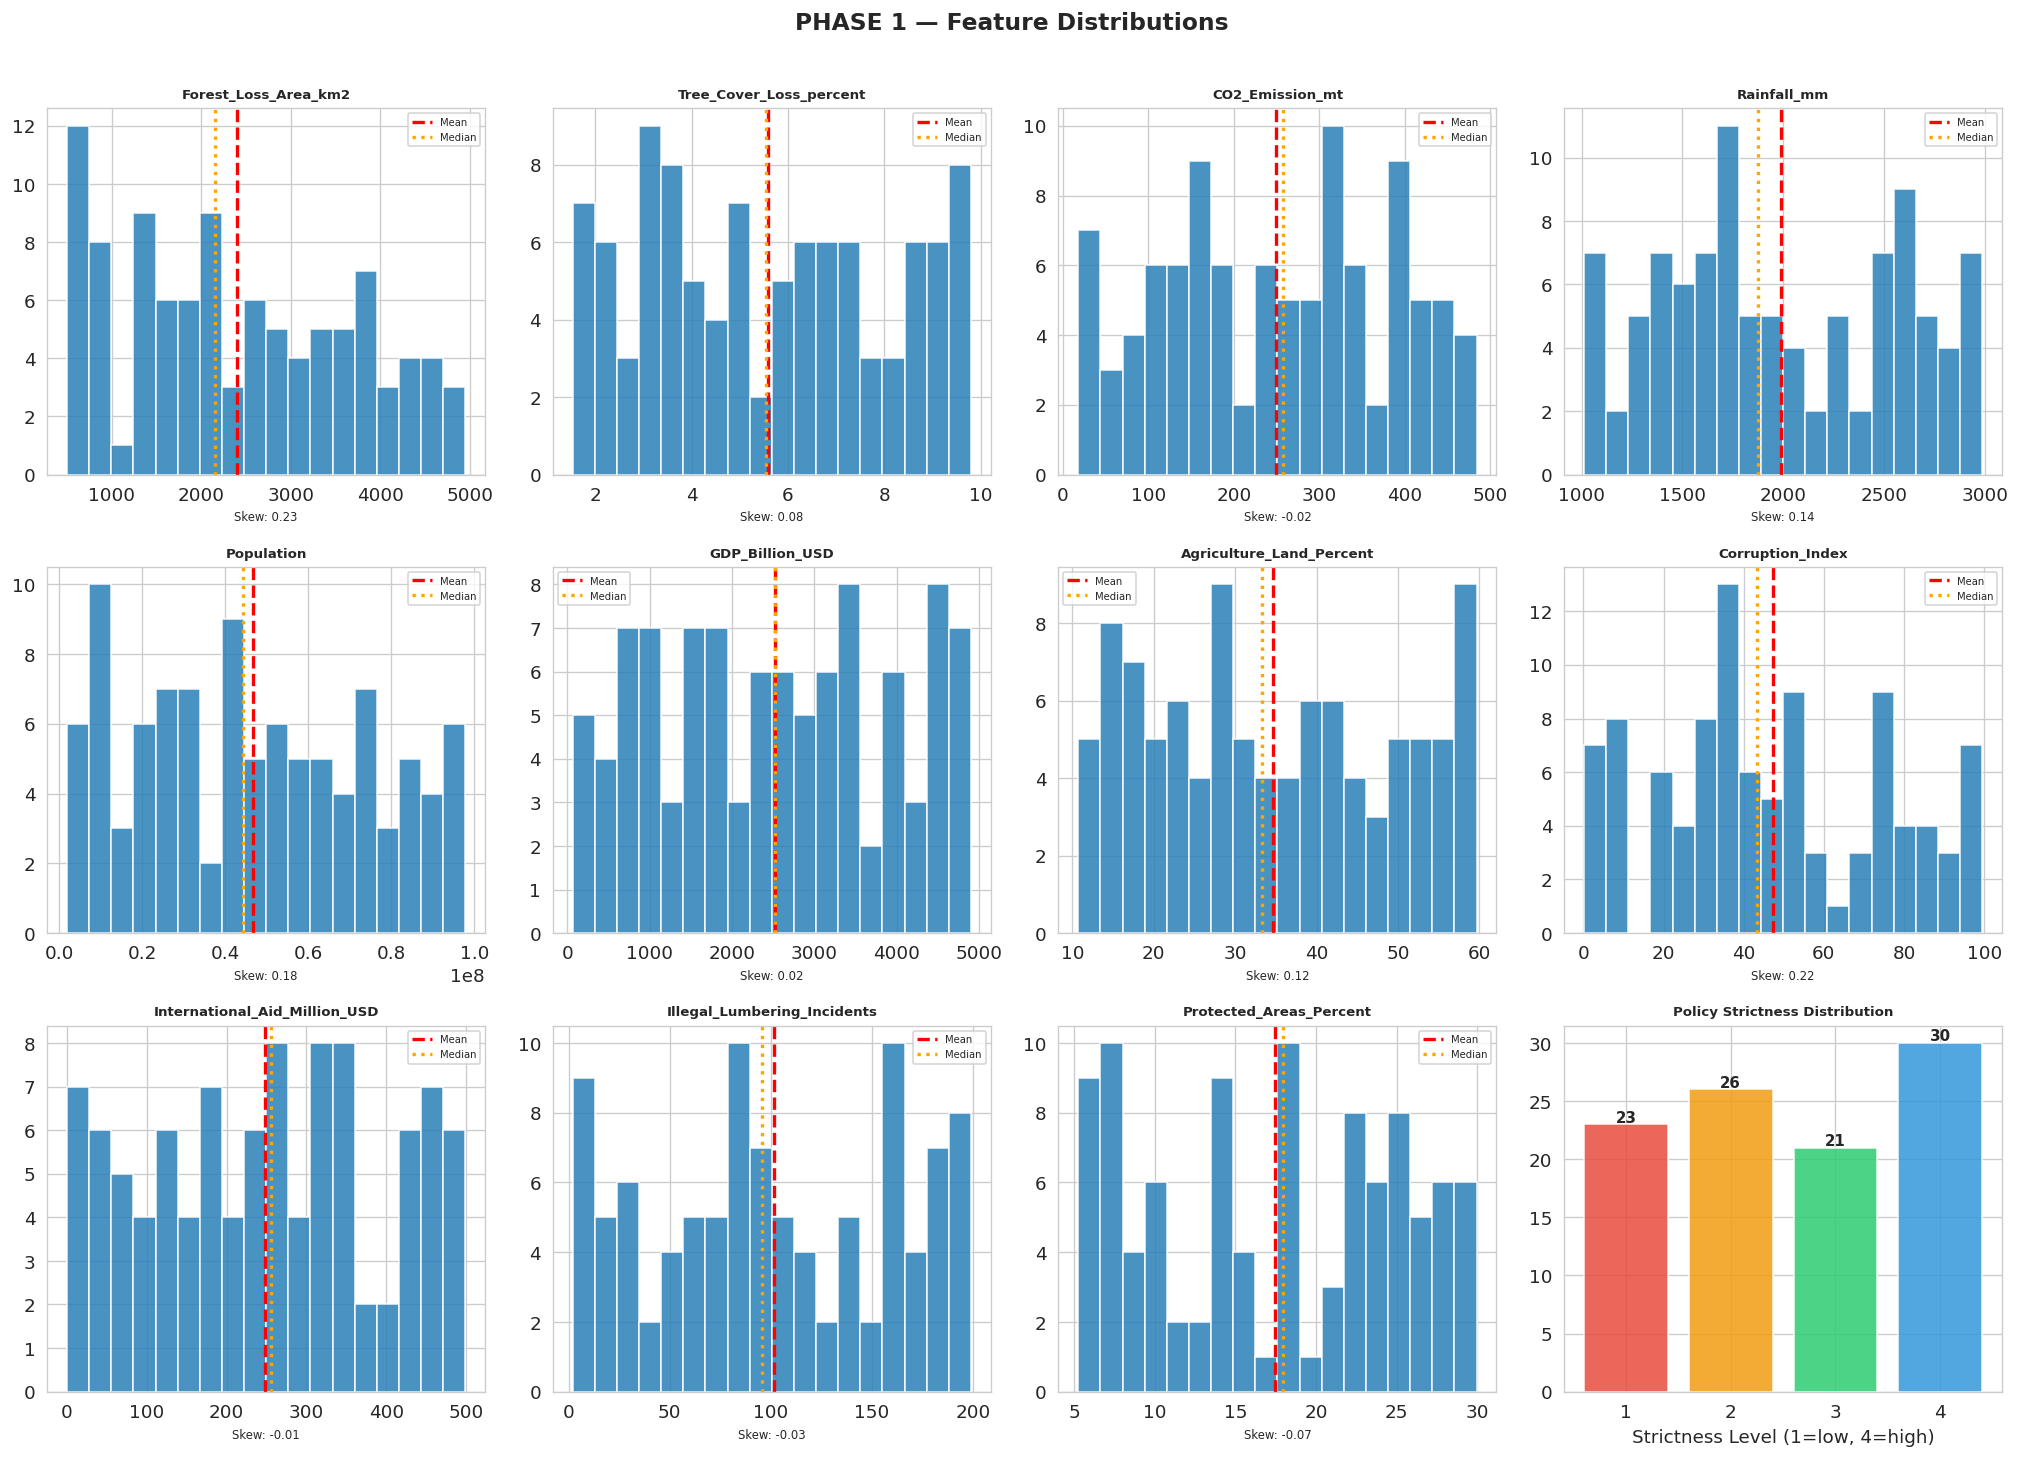

In [5]:
#  PHASE 1 | STEP 3a : Feature distributions
num_cols = ['Forest_Loss_Area_km2', 'Tree_Cover_Loss_percent',
            'CO2_Emission_mt', 'Rainfall_mm', 'Population',
            'GDP_Billion_USD', 'Agriculture_Land_Percent',
            'Corruption_Index', 'International_Aid_Million_USD',
            'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent']

fig, axes = plt.subplots(3, 4, figsize=(17, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    ax.hist(df[col], bins=18, color='#2980b9', edgecolor='white', alpha=0.85)
    ax.axvline(df[col].mean(),   color='red',    lw=2, linestyle='--', label='Mean')
    ax.axvline(df[col].median(), color='orange', lw=2, linestyle=':',  label='Median')
    ax.set_title(col, fontsize=8, fontweight='bold')
    ax.set_xlabel(f'Skew: {df[col].skew():.2f}', fontsize=7)
    ax.legend(fontsize=6)

# Policy strictness bar
ax = axes[-1]
counts = df['Deforestation_Policy_Strictness'].value_counts().sort_index()
bars = ax.bar(counts.index.astype(str), counts.values,
              color=['#e74c3c','#f39c12','#2ecc71','#3498db'], alpha=0.85, edgecolor='white')
ax.set_title('Policy Strictness Distribution', fontsize=8, fontweight='bold')
ax.set_xlabel('Strictness Level (1=low, 4=high)')
for bar, val in zip(bars, counts.values):
    ax.text(bar.get_x()+bar.get_width()/2, val+0.2, str(val),
            ha='center', fontsize=9, fontweight='bold')

plt.suptitle('PHASE 1 — Feature Distributions', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

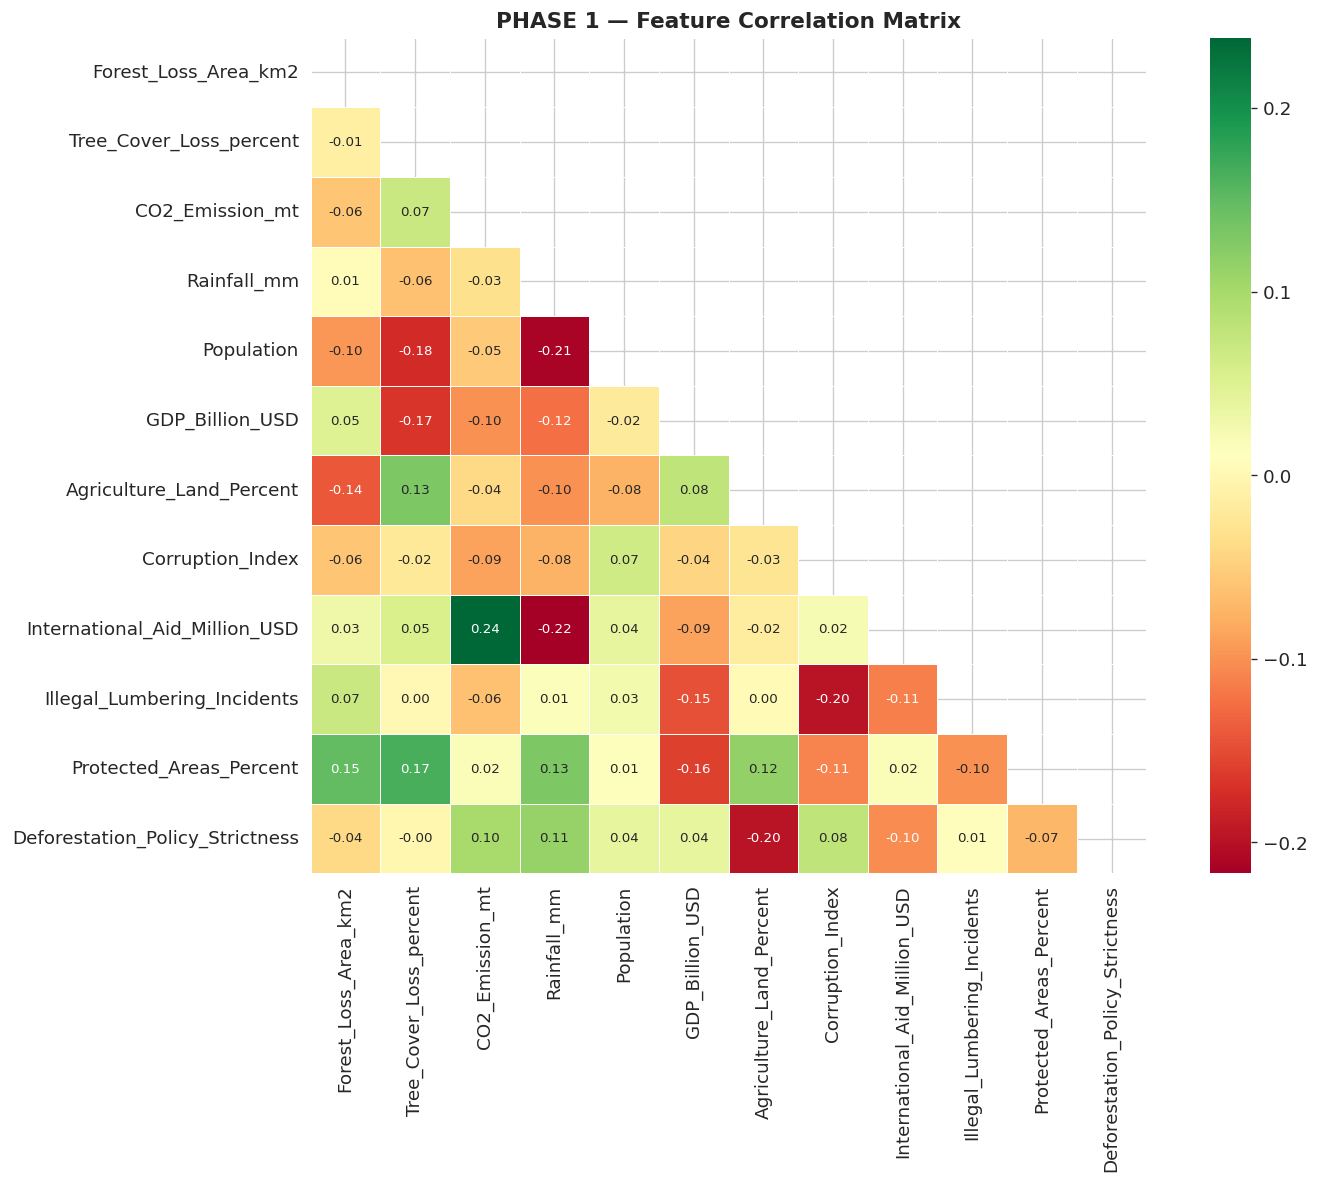

In [6]:
#  PHASE 1 | STEP 3b : Correlation heatmap
fig, ax = plt.subplots(figsize=(13, 10))
corr = df[num_cols + ['Deforestation_Policy_Strictness']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdYlGn',
            mask=mask, ax=ax, linewidths=0.5, square=True,
            annot_kws={'size': 8})
ax.set_title('PHASE 1 — Feature Correlation Matrix', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

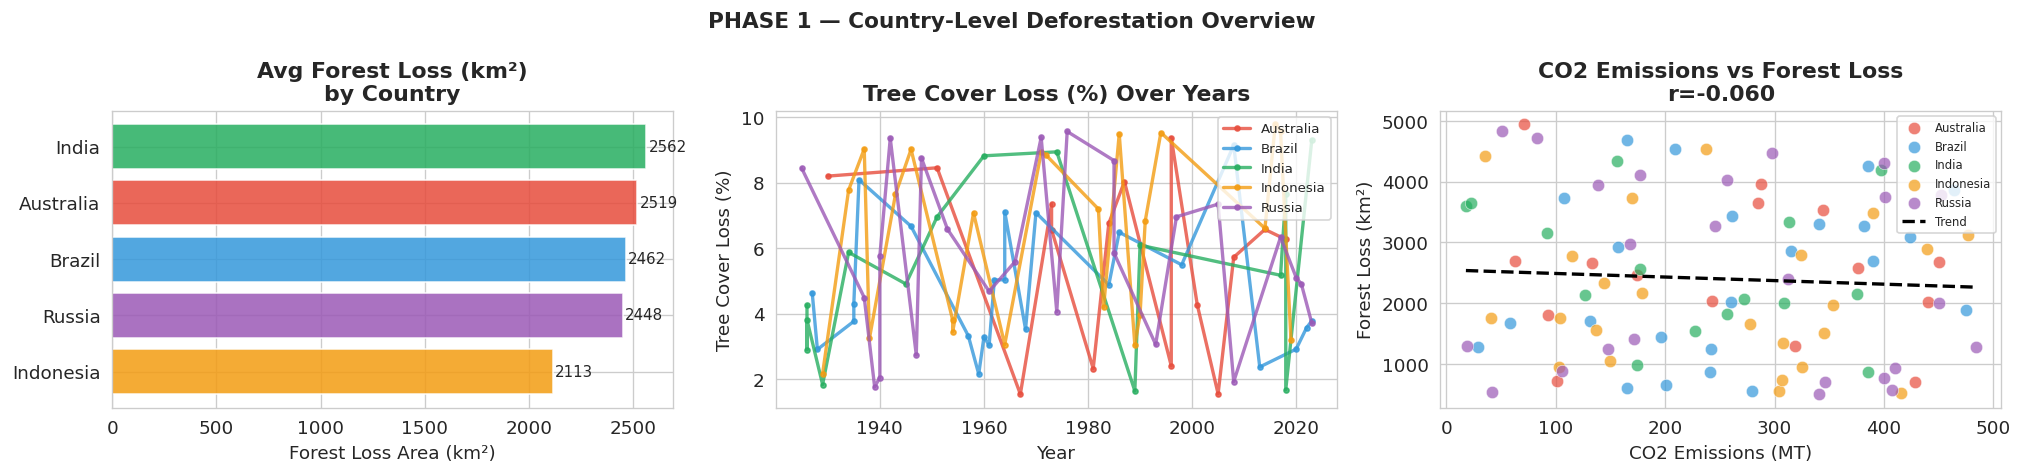

In [8]:
#  PHASE 1 | STEP 3c : Country-level analysis
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
fig.suptitle('PHASE 1 — Country-Level Deforestation Overview', fontsize=13, fontweight='bold')

country_palette = ['#e74c3c','#3498db','#27ae60','#f39c12','#9b59b6']
countries = sorted(df['Country'].unique())

# Avg Forest Loss per country
ax = axes[0]
avg_loss = df.groupby('Country')['Forest_Loss_Area_km2'].mean().sort_values(ascending=True)
ax.barh(avg_loss.index, avg_loss.values,
        color=[country_palette[countries.index(c)] for c in avg_loss.index],
        alpha=0.85, edgecolor='white')
ax.set_title('Avg Forest Loss (km²)\nby Country', fontweight='bold')
ax.set_xlabel('Forest Loss Area (km²)')
for i, val in enumerate(avg_loss.values):
    ax.text(val+10, i, f'{val:.0f}', va='center', fontsize=9)

# Tree Cover Loss trend over years
ax = axes[1]
for country, color in zip(countries, country_palette):
    subset = df[df['Country']==country].sort_values('Year')
    ax.plot(subset['Year'], subset['Tree_Cover_Loss_percent'],
            lw=2, color=color, marker='o', markersize=3, label=country, alpha=0.8)
ax.set_title('Tree Cover Loss (%) Over Years', fontweight='bold')
ax.set_xlabel('Year'); ax.set_ylabel('Tree Cover Loss (%)')
ax.legend(fontsize=8)

# CO2 vs Deforestation
ax = axes[2]
for country, color in zip(countries, country_palette):
    mask = df['Country'] == country
    ax.scatter(df[mask]['CO2_Emission_mt'], df[mask]['Forest_Loss_Area_km2'],
               color=color, s=55, alpha=0.7, edgecolors='white', lw=0.4, label=country)
z = np.polyfit(df['CO2_Emission_mt'], df['Forest_Loss_Area_km2'], 1)
xline = np.linspace(df['CO2_Emission_mt'].min(), df['CO2_Emission_mt'].max(), 100)
ax.plot(xline, np.poly1d(z)(xline), 'k--', lw=2, label='Trend')
corr_val = df['CO2_Emission_mt'].corr(df['Forest_Loss_Area_km2'])
ax.set_title(f'CO2 Emissions vs Forest Loss\nr={corr_val:.3f}', fontweight='bold')
ax.set_xlabel('CO2 Emissions (MT)'); ax.set_ylabel('Forest Loss (km²)')
ax.legend(fontsize=7)

plt.tight_layout()
plt.show()

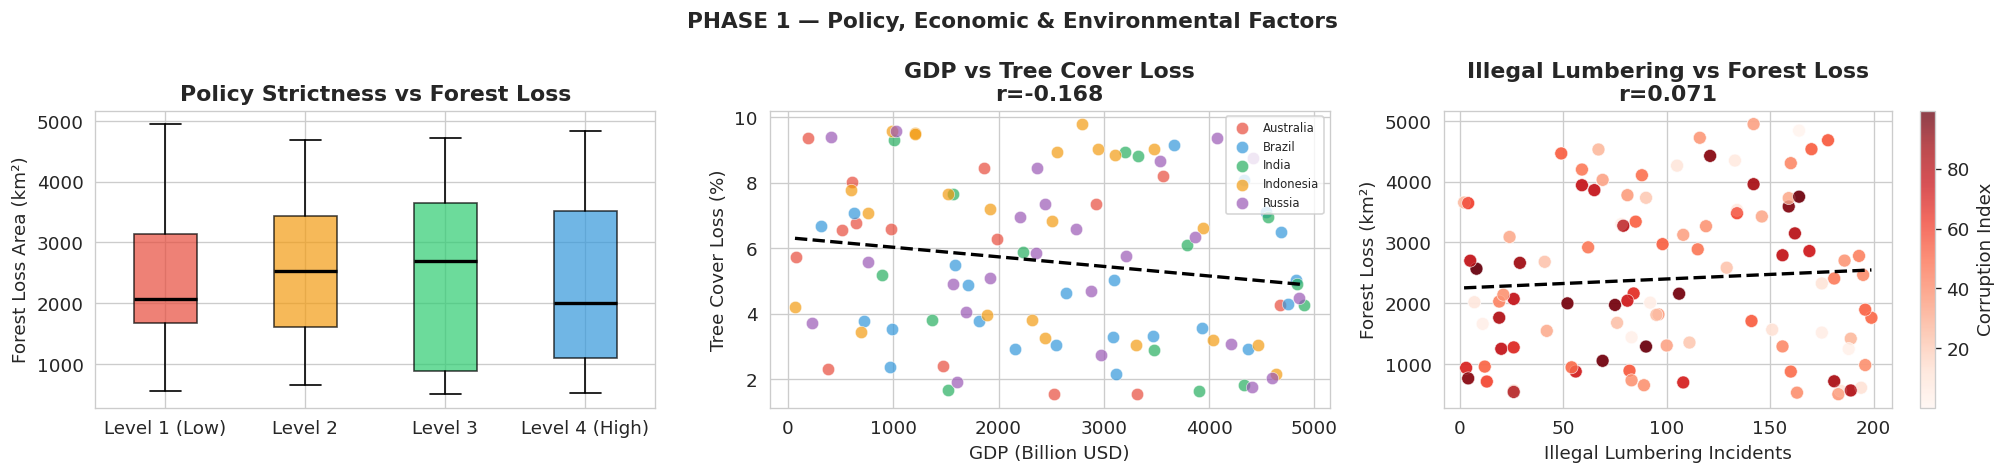

In [10]:
#  PHASE 1 | STEP 3d : Policy & economic factors
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
fig.suptitle('PHASE 1 — Policy, Economic & Environmental Factors', fontsize=13, fontweight='bold')

# Policy Strictness vs Forest Loss
ax = axes[0]
policy_groups = [df[df['Deforestation_Policy_Strictness']==i]['Forest_Loss_Area_km2'].values
                 for i in [1,2,3,4]]
bp = ax.boxplot(policy_groups, patch_artist=True,
                medianprops=dict(color='black', lw=2))
colors_bp = ['#e74c3c','#f39c12','#2ecc71','#3498db']
for patch, color in zip(bp['boxes'], colors_bp):
    patch.set_facecolor(color); patch.set_alpha(0.7)
ax.set_xticklabels(['Level 1 (Low)','Level 2','Level 3','Level 4 (High)'])
ax.set_title('Policy Strictness vs Forest Loss', fontweight='bold')
ax.set_ylabel('Forest Loss Area (km²)')

# GDP vs Tree Cover Loss
ax = axes[1]
for country, color in zip(countries, country_palette):
    mask = df['Country'] == country
    ax.scatter(df[mask]['GDP_Billion_USD'], df[mask]['Tree_Cover_Loss_percent'],
               color=color, s=55, alpha=0.7, edgecolors='white', lw=0.4, label=country)
z2 = np.polyfit(df['GDP_Billion_USD'], df['Tree_Cover_Loss_percent'], 1)
x2 = np.linspace(df['GDP_Billion_USD'].min(), df['GDP_Billion_USD'].max(), 100)
ax.plot(x2, np.poly1d(z2)(x2), 'k--', lw=2)
ax.set_title(f'GDP vs Tree Cover Loss\nr={df["GDP_Billion_USD"].corr(df["Tree_Cover_Loss_percent"]):.3f}',
             fontweight='bold')
ax.set_xlabel('GDP (Billion USD)'); ax.set_ylabel('Tree Cover Loss (%)')
ax.legend(fontsize=7)

# Illegal Lumbering vs Forest Loss
ax = axes[2]
ax.scatter(df['Illegal_Lumbering_Incidents'], df['Forest_Loss_Area_km2'],
           c=df['Corruption_Index'], cmap='Reds', s=60, alpha=0.75,
           edgecolors='white', lw=0.4)
sc = ax.scatter(df['Illegal_Lumbering_Incidents'], df['Forest_Loss_Area_km2'],
                c=df['Corruption_Index'], cmap='Reds', s=60, alpha=0.75,
                edgecolors='white', lw=0.4)
plt.colorbar(sc, ax=ax, label='Corruption Index')
z3 = np.polyfit(df['Illegal_Lumbering_Incidents'], df['Forest_Loss_Area_km2'], 1)
x3 = np.linspace(df['Illegal_Lumbering_Incidents'].min(),
                 df['Illegal_Lumbering_Incidents'].max(), 100)
ax.plot(x3, np.poly1d(z3)(x3), 'k--', lw=2)
corr3 = df['Illegal_Lumbering_Incidents'].corr(df['Forest_Loss_Area_km2'])
ax.set_title(f'Illegal Lumbering vs Forest Loss\nr={corr3:.3f}', fontweight='bold')
ax.set_xlabel('Illegal Lumbering Incidents')
ax.set_ylabel('Forest Loss (km²)')

plt.tight_layout()
plt.show()

##  Cell 4 | Step 4 — Outlier Detection & Handling

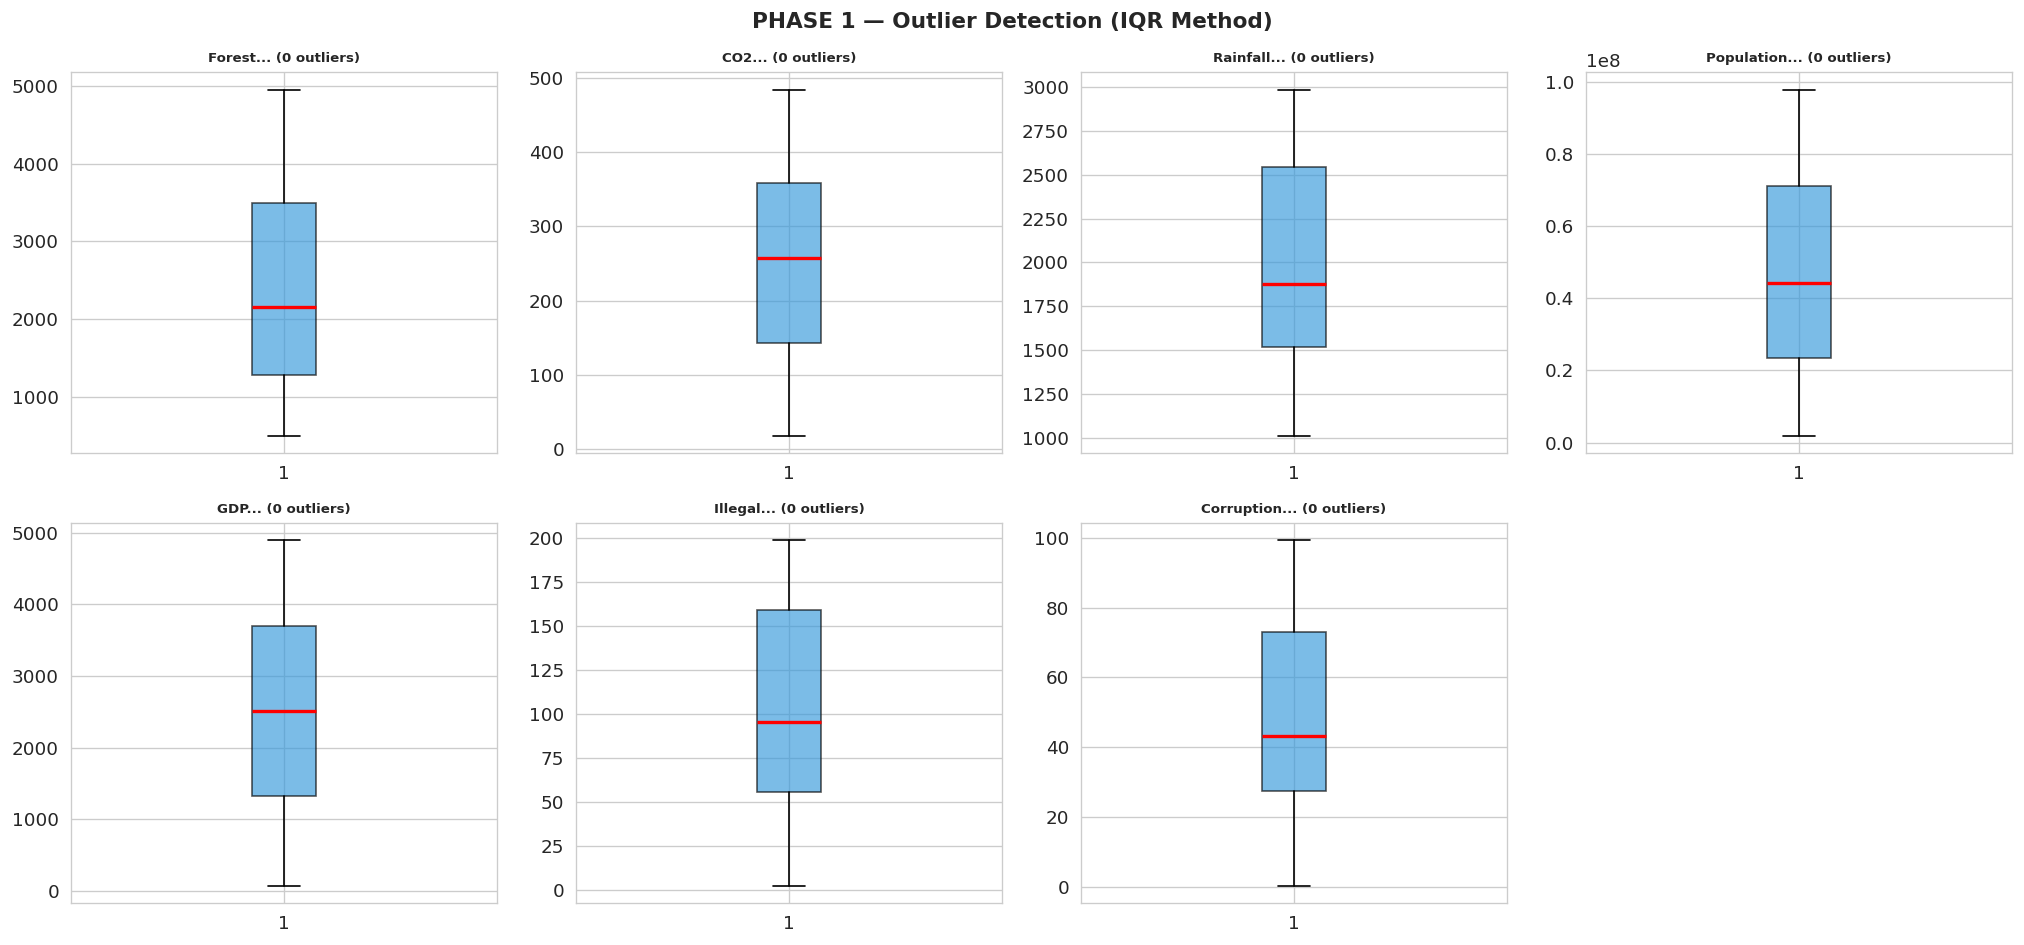

Outlier summary: {'Forest_Loss_Area_km2': 0, 'CO2_Emission_mt': 0, 'Rainfall_mm': 0, 'Population': 0, 'GDP_Billion_USD': 0, 'Illegal_Lumbering_Incidents': 0, 'Corruption_Index': 0}


In [12]:
#  PHASE 1 | STEP 4 : Outlier detection via IQR
outlier_cols = ['Forest_Loss_Area_km2', 'CO2_Emission_mt', 'Rainfall_mm',
                'Population', 'GDP_Billion_USD', 'Illegal_Lumbering_Incidents',
                'Corruption_Index']

fig, axes = plt.subplots(2, 4, figsize=(17, 8))
axes = axes.flatten()
outlier_counts = {}

for i, col in enumerate(outlier_cols):
    data = df[col]
    Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
    IQR    = Q3 - Q1
    n_out  = int(((data < Q1-1.5*IQR) | (data > Q3+1.5*IQR)).sum())
    outlier_counts[col] = n_out
    ax = axes[i]
    ax.boxplot(data, patch_artist=True, vert=True,
               boxprops=dict(facecolor='#3498db', alpha=0.65),
               medianprops=dict(color='red', lw=2),
               flierprops=dict(markerfacecolor='#e74c3c', marker='o', markersize=5))
    ax.set_title(f"{col.split('_')[0]}... ({n_out} outliers)", fontsize=8, fontweight='bold')

axes[-1].axis('off')
plt.suptitle('PHASE 1 — Outlier Detection (IQR Method)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()
print("Outlier summary:", outlier_counts)

 Winsorization applied — dataset size preserved: 100 rows


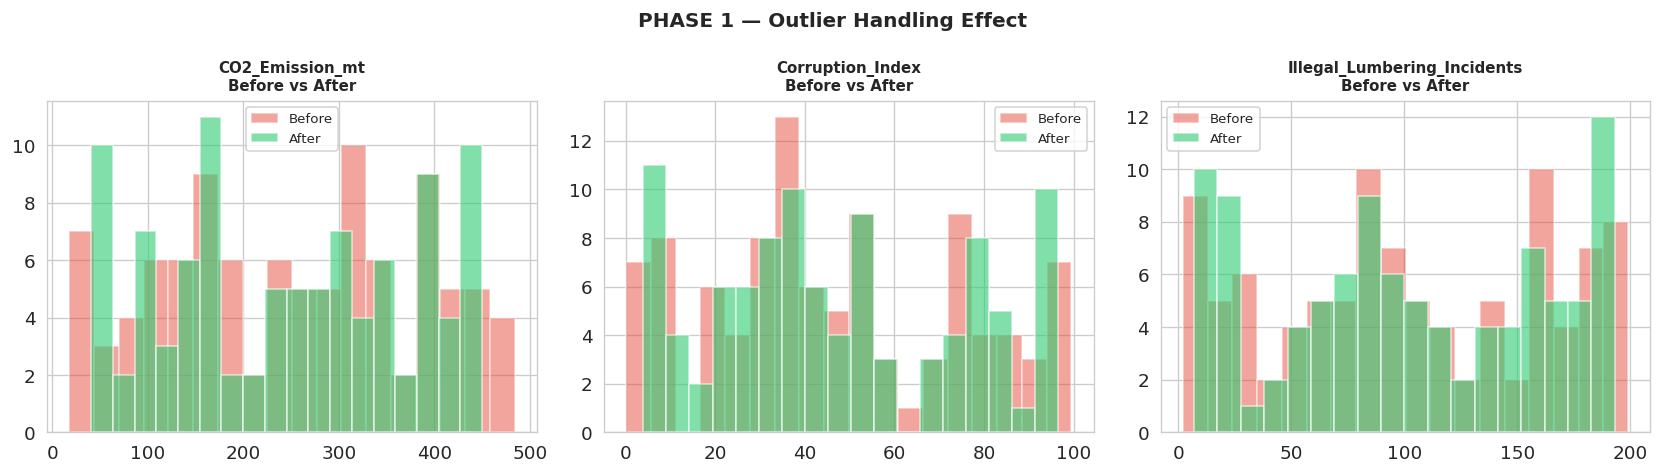

In [13]:
# Winsorize outliers (5th–95th percentile)
df_clean = df.copy()
for col in outlier_cols:
    lo = df_clean[col].quantile(0.05)
    hi = df_clean[col].quantile(0.95)
    df_clean[col] = df_clean[col].clip(lower=lo, upper=hi)

print(f" Winsorization applied — dataset size preserved: {df_clean.shape[0]} rows")

# Before vs After
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, col in zip(axes, ['CO2_Emission_mt','Corruption_Index','Illegal_Lumbering_Incidents']):
    ax.hist(df[col],       bins=18, alpha=0.5, color='#e74c3c', label='Before', edgecolor='white')
    ax.hist(df_clean[col], bins=18, alpha=0.6, color='#2ecc71', label='After',  edgecolor='white')
    ax.set_title(f'{col}\nBefore vs After', fontsize=9, fontweight='bold')
    ax.legend(fontsize=8)
plt.suptitle('PHASE 1 — Outlier Handling Effect', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

##  Cell 5 | Step 5 — Data Cleaning & Encoding

In [14]:
#  PHASE 1 | STEP 5 : Encode categorical features
#
# Country: Label Encoding (5 countries → 0-4)
# Deforestation_Policy_Strictness: already numeric (1-4), keep as-is
# Corruption_Index: already continuous, keep as-is
#
# NOTE: We also demonstrate One-Hot Encoding for Country (creates
# binary columns) — useful for non-ordinal categoricals.

le_country = LabelEncoder()
df_clean['Country_enc'] = le_country.fit_transform(df_clean['Country'])

# One-Hot Encoding for Country (alternative, shown for completeness)
country_dummies = pd.get_dummies(df_clean['Country'], prefix='Country')
df_clean_ohe = pd.concat([df_clean, country_dummies], axis=1)

print(" Label Encoding:")
for original, encoded in zip(le_country.classes_, range(len(le_country.classes_))):
    print(f"   {original:<15} → {encoded}")

print(f"\n One-Hot Encoding added: {country_dummies.columns.tolist()}")
print(f"\n   Deforestation_Policy_Strictness values: {sorted(df_clean['Deforestation_Policy_Strictness'].unique())}")
print(f"   → Already numeric (1=low, 4=high strictness) — no encoding needed")
print(f"\n   Corruption_Index: continuous [0–100] — no encoding needed")

# Final check for missing values after cleaning
print(f"\nMissing values after cleaning: {df_clean.isnull().sum().sum()}")

 Label Encoding:
   Australia       → 0
   Brazil          → 1
   India           → 2
   Indonesia       → 3
   Russia          → 4

 One-Hot Encoding added: ['Country_Australia', 'Country_Brazil', 'Country_India', 'Country_Indonesia', 'Country_Russia']

   Deforestation_Policy_Strictness values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
   → Already numeric (1=low, 4=high strictness) — no encoding needed

   Corruption_Index: continuous [0–100] — no encoding needed

Missing values after cleaning: 0


##  Cell 6 | Step 6 — Feature Engineering & Target Variable

In [15]:
#  PHASE 1 | STEP 6 : Feature engineering

# 1. Forest Loss per GDP (economic-adjusted deforestation intensity)
df_clean['Forest_Loss_per_GDP'] = (
    df_clean['Forest_Loss_Area_km2'] /
    (df_clean['GDP_Billion_USD'] + 0.001)
)

# 2. Corruption-Adjusted Policy (effective policy = strictness × (100 - corruption))
df_clean['Effective_Policy'] = (
    df_clean['Deforestation_Policy_Strictness'] *
    (100 - df_clean['Corruption_Index']) / 100
)

# 3. Population-normalized Illegal Lumbering
df_clean['Lumbering_per_100k'] = (
    df_clean['Illegal_Lumbering_Incidents'] /
    (df_clean['Population'] / 1e5 + 0.001)
)

# 4. Rainfall-Agriculture stress index (low rain + high agri = stress)
df_clean['RainAgri_Stress'] = (
    df_clean['Agriculture_Land_Percent'] /
    (df_clean['Rainfall_mm'] / 1000 + 0.001)
)

# 5. Protected Area Effectiveness
df_clean['Protection_Efficiency'] = (
    df_clean['Protected_Areas_Percent'] *
    df_clean['Deforestation_Policy_Strictness']
)

new_feats = ['Forest_Loss_per_GDP','Effective_Policy','Lumbering_per_100k',
             'RainAgri_Stress','Protection_Efficiency']
print(" 5 Engineered Features:")
for f in new_feats:
    print(f"   {f:<30}  mean={df_clean[f].mean():.3f}  std={df_clean[f].std():.3f}")

 5 Engineered Features:
   Forest_Loss_per_GDP             mean=1.727  std=2.353
   Effective_Policy                mean=1.334  std=1.046
   Lumbering_per_100k              mean=0.393  std=0.514
   RainAgri_Stress                 mean=19.205  std=10.978
   Protection_Efficiency           mean=44.363  std=29.344


Tertile thresholds: Low ≤ 3.96% | Medium ≤ 6.96% | High > 6.96%

Class distribution:
Severity_Label
High      34
Medium    33
Low       33
Name: count, dtype: int64


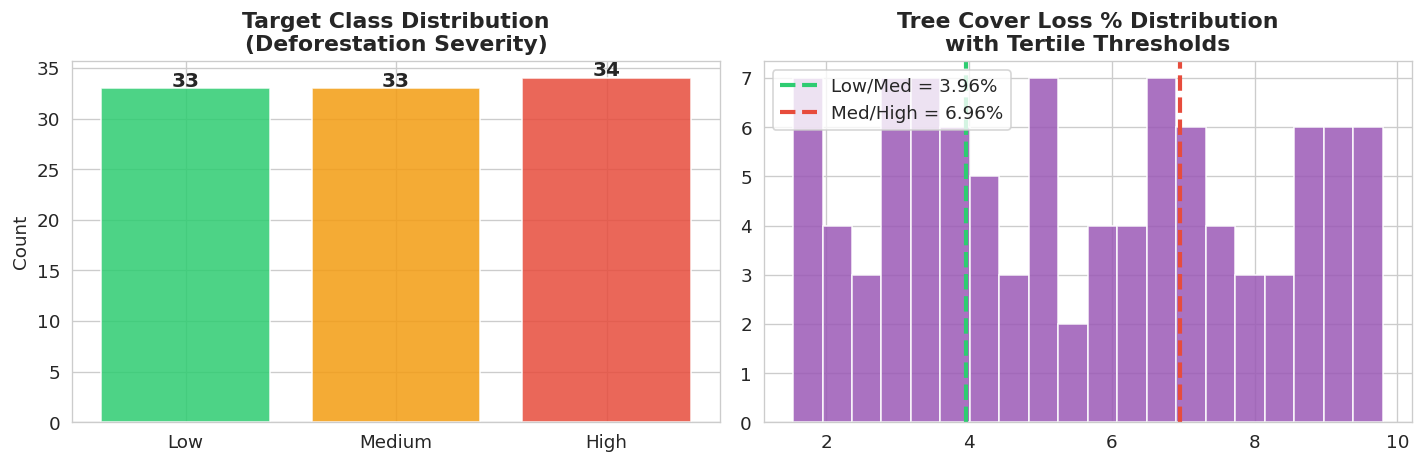

In [16]:
#  TARGET VARIABLE: Deforestation Severity (3-class)
#
# JUSTIFICATION for Tertile-Based Classification:
# ────────────────────────────────────────────────────────────────────
# We use Tree_Cover_Loss_percent as the primary target (proportional,
# comparable across countries of different sizes). A tertile split
# (33rd/67th percentile) creates BALANCED classes (≈33 each), which
# is critical for SVM training. Hard thresholds (e.g., >5% = High)
# could create severely imbalanced classes on this 100-record dataset.

t33 = df_clean['Tree_Cover_Loss_percent'].quantile(1/3)
t67 = df_clean['Tree_Cover_Loss_percent'].quantile(2/3)

def assign_severity(val):
    if val <= t33:   return 0   # Low
    elif val <= t67: return 1   # Medium
    else:            return 2   # High

df_clean['Deforestation_Severity'] = df_clean['Tree_Cover_Loss_percent'].apply(assign_severity)
label_map = {0: 'Low', 1: 'Medium', 2: 'High'}
df_clean['Severity_Label'] = df_clean['Deforestation_Severity'].map(label_map)

print(f"Tertile thresholds: Low ≤ {t33:.2f}% | Medium ≤ {t67:.2f}% | High > {t67:.2f}%")
print(f"\nClass distribution:")
print(df_clean['Severity_Label'].value_counts())

# Visualize target
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
counts = df_clean['Severity_Label'].value_counts().reindex(['Low','Medium','High'])
colors3 = ['#2ecc71','#f39c12','#e74c3c']
bars = axes[0].bar(counts.index, counts.values, color=colors3, alpha=0.85, edgecolor='white')
axes[0].set_title('Target Class Distribution\n(Deforestation Severity)', fontweight='bold')
axes[0].set_ylabel('Count')
for bar, val in zip(bars, counts.values):
    axes[0].text(bar.get_x()+bar.get_width()/2, val+0.2,
                 str(val), ha='center', fontsize=12, fontweight='bold')

axes[1].hist(df_clean['Tree_Cover_Loss_percent'], bins=20,
             color='#9b59b6', edgecolor='white', alpha=0.85)
axes[1].axvline(t33, color='#2ecc71', lw=2.5, linestyle='--',
                label=f'Low/Med = {t33:.2f}%')
axes[1].axvline(t67, color='#e74c3c', lw=2.5, linestyle='--',
                label=f'Med/High = {t67:.2f}%')
axes[1].set_title('Tree Cover Loss % Distribution\nwith Tertile Thresholds', fontweight='bold')
axes[1].legend()
plt.tight_layout()
plt.show()

##  Cell 7 | Step 7 — Feature Scaling & Train/Test Split

 StandardScaler applied to 17 features

   Total samples  : 100
   Train set       : 80 (80%)
   Test  set       : 20  (20%)

   Train class balance: {'High': np.int64(27), 'Medium': np.int64(27), 'Low': np.int64(26)}
   Test  class balance: {'Low': np.int64(7), 'High': np.int64(7), 'Medium': np.int64(6)}


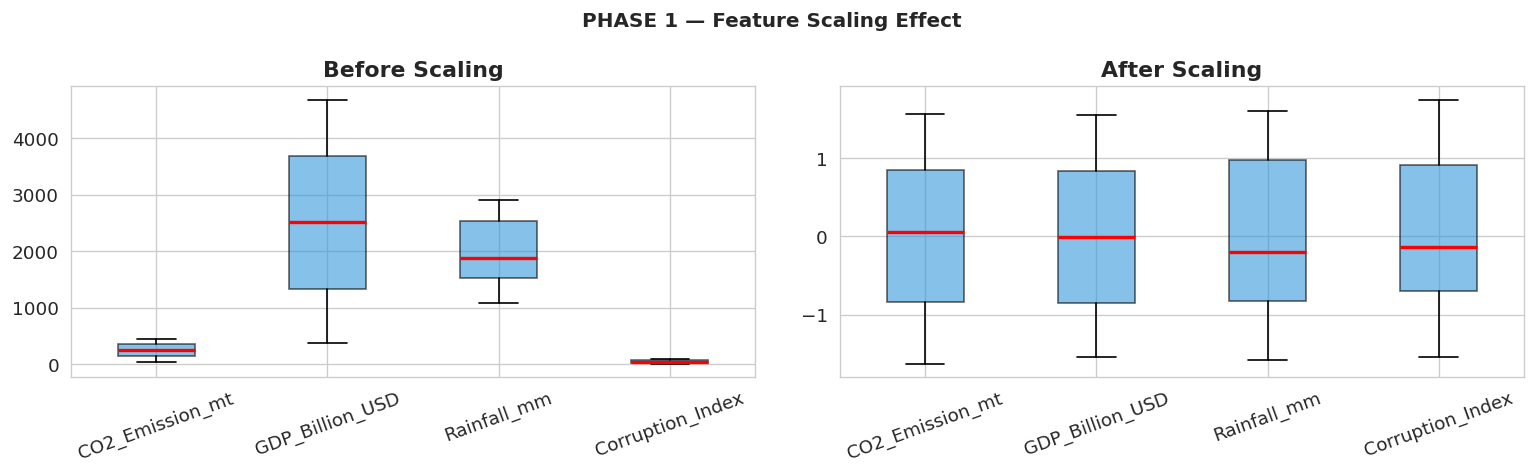

In [17]:
#  PHASE 1 | STEP 7 : Scale & split
feature_cols = [
    'CO2_Emission_mt', 'Rainfall_mm', 'Population', 'GDP_Billion_USD',
    'Agriculture_Land_Percent', 'Deforestation_Policy_Strictness',
    'Corruption_Index', 'International_Aid_Million_USD',
    'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent',
    'Country_enc', 'Year',
    'Forest_Loss_per_GDP', 'Effective_Policy', 'Lumbering_per_100k',
    'RainAgri_Stress', 'Protection_Efficiency'
]

X = df_clean[feature_cols]
y = df_clean['Deforestation_Severity']

# StandardScaler: zero mean, unit variance — required for SVM kernels
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_cols)

# Stratified split: preserves class balance in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f" StandardScaler applied to {len(feature_cols)} features")
print(f"\n   Total samples  : {len(X_scaled)}")
print(f"   Train set       : {len(X_train)} ({len(X_train)/len(X_scaled)*100:.0f}%)")
print(f"   Test  set       : {len(X_test)}  ({len(X_test)/len(X_scaled)*100:.0f}%)")
print(f"\n   Train class balance: {dict(y_train.value_counts().rename(label_map))}")
print(f"   Test  class balance: {dict(y_test.value_counts().rename(label_map))}")

# Show scaling effect
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
for ax, cols_sub, title in zip(axes,
    [['CO2_Emission_mt','GDP_Billion_USD','Population','Rainfall_mm'],
     ['CO2_Emission_mt','GDP_Billion_USD','Population','Rainfall_mm']],
    ['Before Scaling','After Scaling']):
    if title == 'Before Scaling':
        data_show = df_clean[['CO2_Emission_mt','GDP_Billion_USD','Rainfall_mm','Corruption_Index']]
    else:
        data_show = X_scaled[['CO2_Emission_mt','GDP_Billion_USD','Rainfall_mm','Corruption_Index']]
    ax.boxplot(data_show.values, patch_artist=True,
               labels=data_show.columns,
               boxprops=dict(facecolor='#3498db', alpha=0.6),
               medianprops=dict(color='red', lw=2))
    ax.set_title(title, fontweight='bold')
    ax.tick_params(axis='x', rotation=20)
plt.suptitle('PHASE 1 — Feature Scaling Effect', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

---
#  PHASE 2 — SVM Model Building & Evaluation

##  Cell 8 | Step 8 — SVM: Linear Kernel Baseline

In [18]:
#  PHASE 2 | STEP 8 : Linear SVM baseline
svm_linear = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear   = svm_linear.predict(X_test)
y_prob_linear   = svm_linear.predict_proba(X_test)
train_acc_linear = accuracy_score(y_train, svm_linear.predict(X_train))
test_acc_linear  = accuracy_score(y_test, y_pred_linear)

print("=" * 55)
print("   SVM LINEAR KERNEL — BASELINE RESULTS")
print("=" * 55)
print(f"  Train Accuracy : {train_acc_linear:.4f}")
print(f"  Test  Accuracy : {test_acc_linear:.4f}")
print(f"  Train-Test Gap : {(train_acc_linear - test_acc_linear):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_linear,
      target_names=['Low','Medium','High']))

   SVM LINEAR KERNEL — BASELINE RESULTS
  Train Accuracy : 0.6500
  Test  Accuracy : 0.3000
  Train-Test Gap : 0.3500

Classification Report:
              precision    recall  f1-score   support

         Low       0.27      0.43      0.33         7
      Medium       0.20      0.17      0.18         6
        High       0.50      0.29      0.36         7

    accuracy                           0.30        20
   macro avg       0.32      0.29      0.29        20
weighted avg       0.33      0.30      0.30        20



##  Cell 9 | Step 9 — Evaluation Metrics & Confusion Matrix

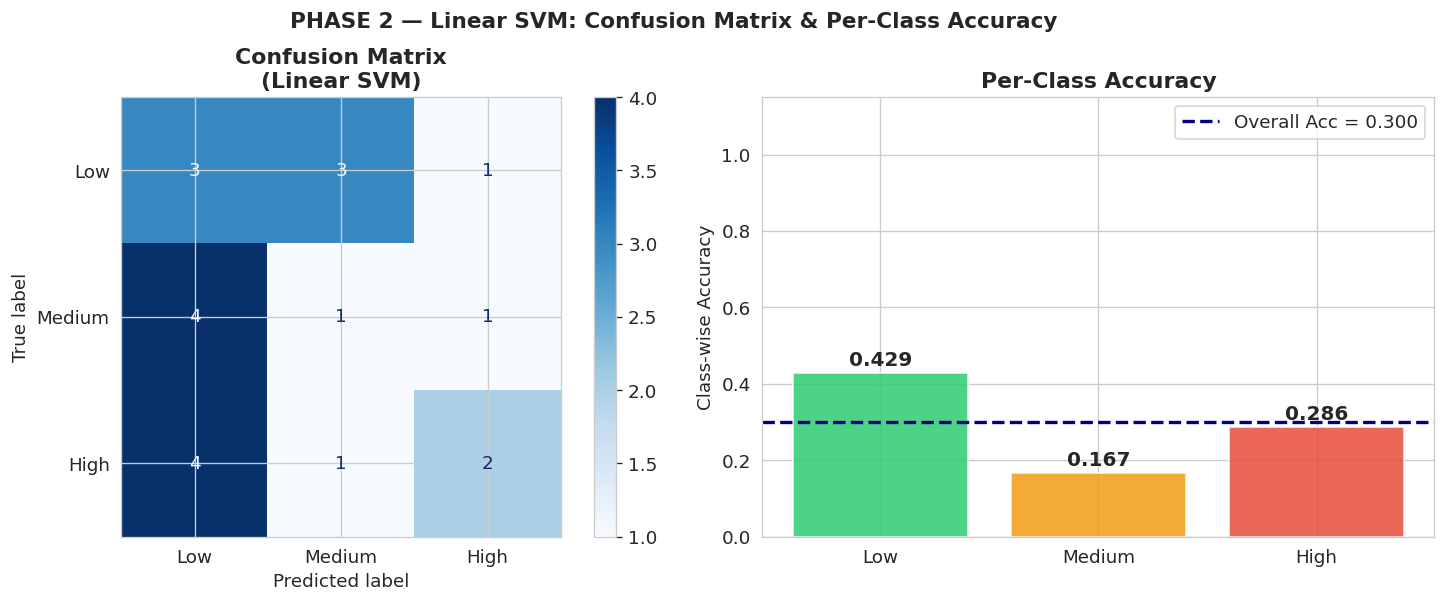

In [19]:
#  PHASE 2 | STEP 9 : Confusion matrix + evaluation
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('PHASE 2 — Linear SVM: Confusion Matrix & Per-Class Accuracy',
             fontsize=13, fontweight='bold')

cm = confusion_matrix(y_test, y_pred_linear)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Low','Medium','High'])
disp.plot(ax=axes[0], colorbar=True, cmap='Blues')
axes[0].set_title('Confusion Matrix\n(Linear SVM)', fontweight='bold')

# Per-class accuracy from CM
class_acc = cm.diagonal() / cm.sum(axis=1)
axes[1].bar(['Low','Medium','High'], class_acc,
            color=['#2ecc71','#f39c12','#e74c3c'], alpha=0.85, edgecolor='white')
axes[1].axhline(test_acc_linear, color='navy', linestyle='--', lw=2,
                label=f'Overall Acc = {test_acc_linear:.3f}')
axes[1].set_ylim(0, 1.15)
axes[1].set_ylabel('Class-wise Accuracy')
axes[1].set_title('Per-Class Accuracy', fontweight='bold')
axes[1].legend()
for i, val in enumerate(class_acc):
    axes[1].text(i, val+0.02, f'{val:.3f}', ha='center',
                 fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

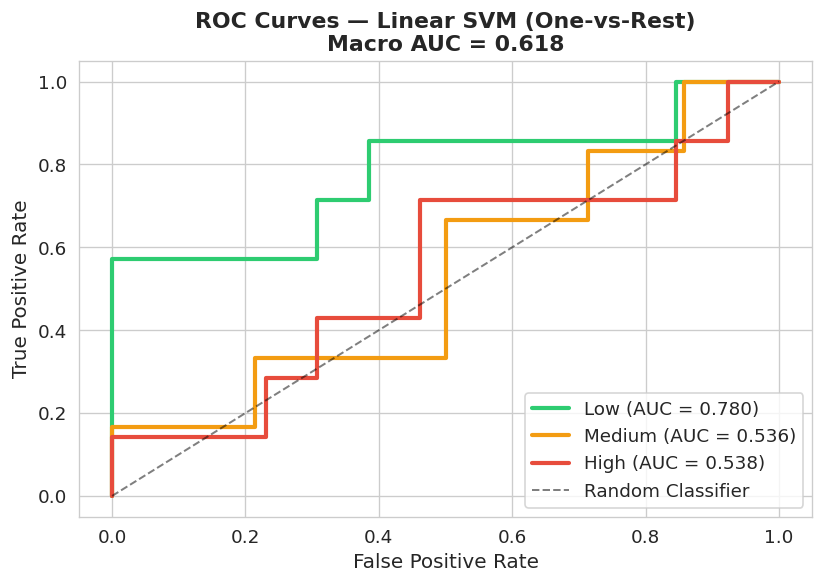

In [20]:
#  Multi-class ROC curves
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
class_names_roc = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(figsize=(7, 5))
colors_roc = ['#2ecc71','#f39c12','#e74c3c']
auc_scores = []

for i, (cls, color) in enumerate(zip(class_names_roc, colors_roc)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_linear[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    ax.plot(fpr, tpr, lw=2.5, color=color, label=f'{cls} (AUC = {roc_auc:.3f})')

ax.plot([0,1],[0,1],'k--', lw=1.2, alpha=0.5, label='Random Classifier')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title(f'ROC Curves — Linear SVM (One-vs-Rest)\nMacro AUC = {np.mean(auc_scores):.3f}',
             fontweight='bold')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

##  Cell 10 | Step 10 — Polynomial & RBF Kernels Comparison

In [21]:
#  PHASE 2 | STEP 10 : Compare all SVM kernels
cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

kernel_configs = {
    'Linear (C=1)':       SVC(kernel='linear',  C=1.0, probability=True, random_state=42),
    'Poly (d=2)':         SVC(kernel='poly',    degree=2, C=1.0, probability=True, random_state=42),
    'Poly (d=3)':         SVC(kernel='poly',    degree=3, C=1.0, probability=True, random_state=42),
    'RBF (C=1,γ=scale)':  SVC(kernel='rbf',    C=1.0,  gamma='scale', probability=True, random_state=42),
    'RBF (C=10,γ=scale)': SVC(kernel='rbf',    C=10.0, gamma='scale', probability=True, random_state=42),
    'Sigmoid':             SVC(kernel='sigmoid', C=1.0, probability=True, random_state=42),
}

kernel_results = {}
for name, model in kernel_configs.items():
    model.fit(X_train, y_train)
    y_pred_k   = model.predict(X_test)
    cv_scores  = cross_val_score(model, X_scaled, y, cv=cv_strat, scoring='accuracy')
    train_a    = accuracy_score(y_train, model.predict(X_train))
    test_a     = accuracy_score(y_test, y_pred_k)
    kernel_results[name] = {
        'train_acc': train_a,
        'test_acc':  test_a,
        'cv_mean':   cv_scores.mean(),
        'cv_std':    cv_scores.std(),
        'gap':       train_a - test_a,
        'model':     model,
        'y_pred':    y_pred_k
    }

print(f"{'Kernel':<22} {'Train':>7} {'Test':>7} {'CV Mean':>9} {'CV Std':>8} {'Gap':>7}")
print("-" * 62)
for name, res in kernel_results.items():
    marker = " ⭐" if res['cv_mean'] == max(r['cv_mean'] for r in kernel_results.values()) else "   "
    print(f"{marker} {name:<20} {res['train_acc']:>7.4f} {res['test_acc']:>7.4f} "
          f"{res['cv_mean']:>9.4f} {res['cv_std']:>8.4f} {res['gap']:>7.4f}")

Kernel                   Train    Test   CV Mean   CV Std     Gap
--------------------------------------------------------------
    Linear (C=1)          0.6500  0.3000    0.3100   0.0860  0.3500
    Poly (d=2)            0.8500  0.2000    0.3200   0.0927  0.6500
    Poly (d=3)            0.9625  0.2500    0.3500   0.0632  0.7125
    RBF (C=1,γ=scale)     0.8625  0.2500    0.3900   0.0663  0.6125
    RBF (C=10,γ=scale)    1.0000  0.2500    0.3900   0.1020  0.7500
 ⭐ Sigmoid               0.4875  0.3500    0.4200   0.1327  0.1375


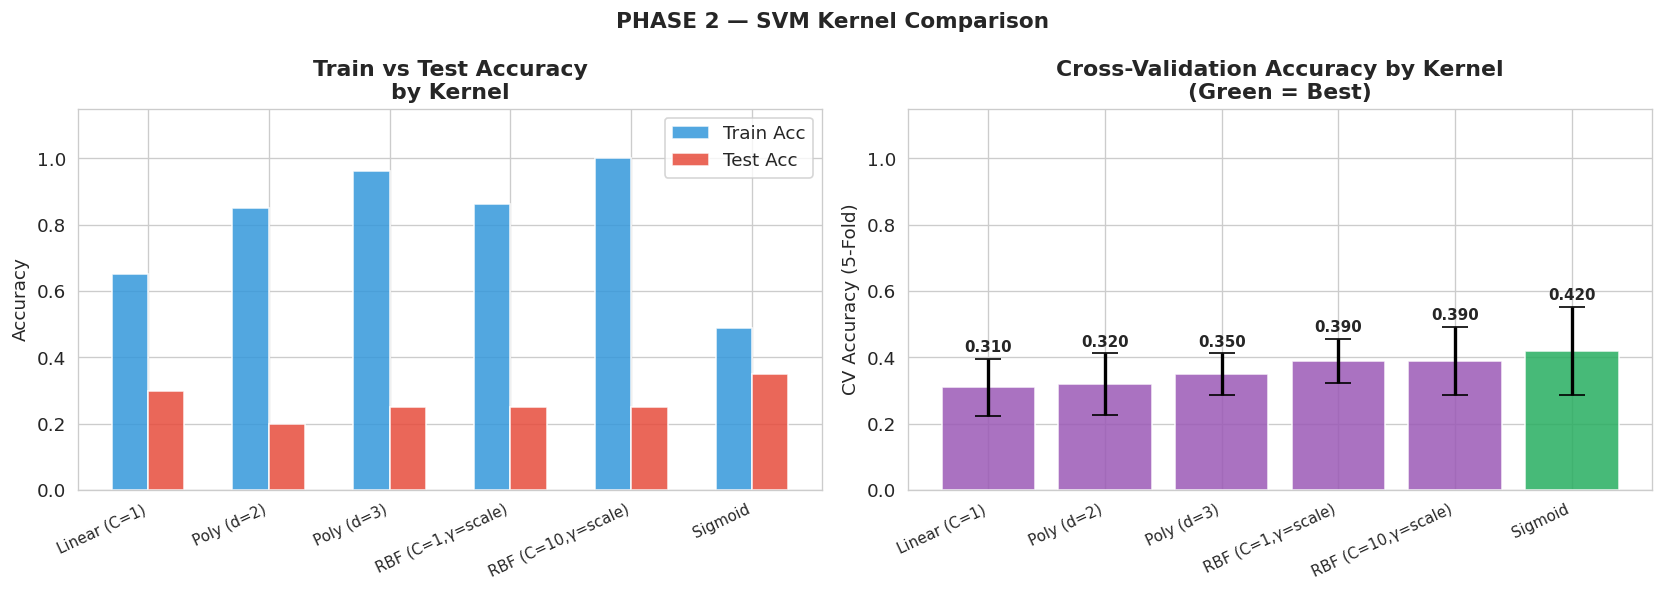

In [23]:
# Kernel comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('PHASE 2 — SVM Kernel Comparison', fontsize=13, fontweight='bold')

kernel_names  = list(kernel_results.keys())
train_accs    = [kernel_results[k]['train_acc'] for k in kernel_names]
test_accs     = [kernel_results[k]['test_acc']  for k in kernel_names]
cv_means      = [kernel_results[k]['cv_mean']   for k in kernel_names]
cv_stds       = [kernel_results[k]['cv_std']    for k in kernel_names]

x = np.arange(len(kernel_names))
w = 0.3
ax = axes[0]
ax.bar(x - w/2, train_accs, w, label='Train Acc', color='#3498db', alpha=0.85, edgecolor='white')
ax.bar(x + w/2, test_accs,  w, label='Test Acc',  color='#e74c3c', alpha=0.85, edgecolor='white')
ax.set_xticks(x)
ax.set_xticklabels(kernel_names, rotation=25, ha='right', fontsize=9)
ax.set_ylim(0, 1.15); ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy\nby Kernel', fontweight='bold')
ax.legend()

ax = axes[1]
best_idx = np.argmax(cv_means)
bar_colors = ['#27ae60' if i == best_idx else '#9b59b6' for i in range(len(kernel_names))]
bars = ax.bar(kernel_names, cv_means, color=bar_colors, alpha=0.85, edgecolor='white',
              yerr=cv_stds, capsize=8, error_kw={'lw': 2, 'ecolor': 'black'})
ax.set_xticks(range(len(kernel_names)))
ax.set_xticklabels(kernel_names, rotation=25, ha='right', fontsize=9)
ax.set_ylim(0, 1.15); ax.set_ylabel('CV Accuracy (5-Fold)')
ax.set_title('Cross-Validation Accuracy by Kernel\n(Green = Best)', fontweight='bold')
for bar, val, std in zip(bars, cv_means, cv_stds):
    ax.text(bar.get_x()+bar.get_width()/2, val+std+0.02,
            f'{val:.3f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

##  Cell 11 | Step 11 — GridSearchCV Hyperparameter Tuning

In [41]:
#  PHASE 2 | STEP 11 : GridSearchCV for best SVM
param_grid = {
    'C':      [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma':  ['scale', 'auto'],
    'degree': [2, 3]           # only used when kernel='poly'
}

grid_search = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid,
    cv=cv_strat,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_scaled, y)

best_params = grid_search.best_params_
best_cv_acc = grid_search.best_score_
print(f" GridSearchCV complete")
print(f"   Best Parameters : {best_params}")
print(f"   Best CV Accuracy: {best_cv_acc:.4f}")

# Show top 10 param combinations
results_df = pd.DataFrame(grid_search.cv_results_)
top10 = results_df.sort_values('mean_test_score', ascending=False).head(10)
print(f"\nTop 10 Parameter Combinations:")
print(top10[['param_C','param_kernel','param_gamma','param_degree',
             'mean_test_score','std_test_score']].round(4).to_string(index=False))

 GridSearchCV complete
   Best Parameters : {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
   Best CV Accuracy: 0.4000

Top 10 Parameter Combinations:
 param_C param_kernel param_gamma  param_degree  mean_test_score  std_test_score
   100.0          rbf       scale             3             0.40          0.1140
   100.0          rbf        auto             3             0.40          0.1140
    10.0         poly       scale             3             0.40          0.0707
    10.0         poly        auto             3             0.40          0.0707
   100.0          rbf       scale             2             0.40          0.1140
   100.0          rbf        auto             2             0.40          0.1140
     1.0          rbf       scale             2             0.39          0.0663
   100.0         poly        auto             2             0.39          0.1020
     1.0          rbf       scale             3             0.39          0.0663
     1.0          rbf      

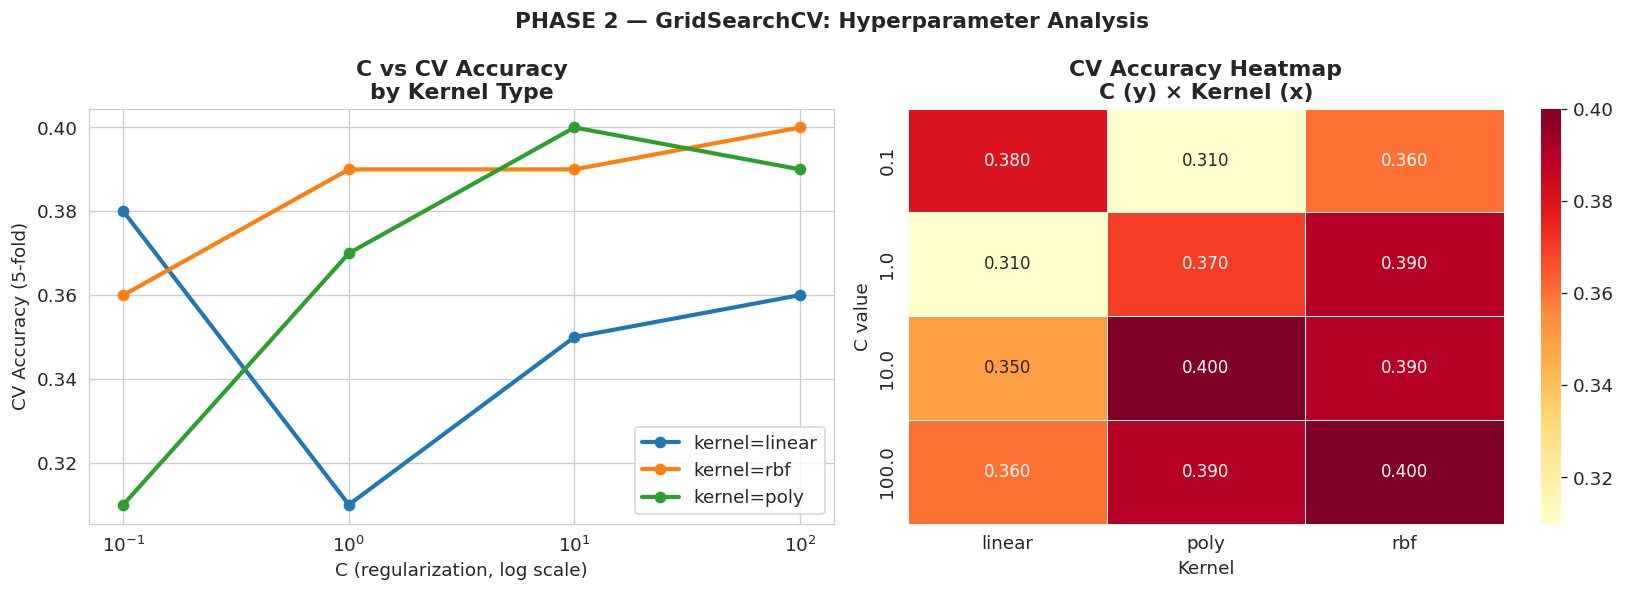

In [43]:
# GridSearch visualization: C vs CV accuracy per kernel
pivot_results = results_df.pivot_table(
    index='param_C', columns='param_kernel',
    values='mean_test_score', aggfunc='max')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('PHASE 2 — GridSearchCV: Hyperparameter Analysis', fontsize=13, fontweight='bold')

ax = axes[0]
for kernel in ['linear','rbf','poly']:
    subset = results_df[results_df['param_kernel']==kernel]
    grouped = subset.groupby('param_C')['mean_test_score'].max()
    ax.plot(grouped.index, grouped.values, marker='o', lw=2.5,
            label=f'kernel={kernel}')
ax.set_xscale('log')
ax.set_xlabel('C (regularization, log scale)')
ax.set_ylabel('CV Accuracy (5-fold)')
ax.set_title('C vs CV Accuracy\nby Kernel Type', fontweight='bold')
ax.legend()

ax = axes[1]
sns.heatmap(pivot_results.round(3), annot=True, fmt='.3f',
            cmap='YlOrRd', ax=ax, linewidths=0.5,
            annot_kws={'size': 10})
ax.set_title('CV Accuracy Heatmap\nC (y) × Kernel (x)', fontweight='bold')
ax.set_xlabel('Kernel')
ax.set_ylabel('C value')

plt.tight_layout()
plt.show()

In [42]:
# Train BEST model from GridSearch
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

y_pred_best    = best_svm.predict(X_test)
y_prob_best    = best_svm.predict_proba(X_test)
train_acc_best = accuracy_score(y_train, best_svm.predict(X_train))
test_acc_best  = accuracy_score(y_test, y_pred_best)
cv_best        = cross_val_score(best_svm, X_scaled, y, cv=cv_strat, scoring='accuracy')

print("=" * 55)
print("   BEST SVM MODEL — RESULTS")
print("=" * 55)
print(f"  Params          : {best_params}")
print(f"  Train Accuracy  : {train_acc_best:.4f}")
print(f"  Test  Accuracy  : {test_acc_best:.4f}")
print(f"  CV    Accuracy  : {cv_best.mean():.4f} \u00b1 {cv_best.std():.4f}")
print(f"  Train-Test Gap  : {(train_acc_best - test_acc_best):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Low','Medium','High']))

   BEST SVM MODEL — RESULTS
  Params          : {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
  Train Accuracy  : 1.0000
  Test  Accuracy  : 0.3000
  CV    Accuracy  : 0.4000 ± 0.0707
  Train-Test Gap  : 0.7000

Classification Report:
              precision    recall  f1-score   support

         Low       0.29      0.29      0.29         7
      Medium       0.00      0.00      0.00         6
        High       0.40      0.57      0.47         7

    accuracy                           0.30        20
   macro avg       0.23      0.29      0.25        20
weighted avg       0.24      0.30      0.26        20



## Cell 12 | Step 12 — Cross-Validation & Robustness Analysis

In [30]:
#  PHASE 2 | STEP 12 : 5-Fold CV robustness analysis
models_to_cv = {
    'Linear SVM':  SVC(kernel='linear', C=1.0, probability=True, random_state=42),
    'Best SVM':    grid_search.best_estimator_,
    'RBF (C=1)':   SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42),
    'RBF (C=10)':  SVC(kernel='rbf', C=10.0, gamma='scale', probability=True, random_state=42),
}

cv_summary = {}
print(f"{'Model':<20} {'F1  F2  F3  F4  F5':^40} {'Mean':>7} {'Std':>7}")
print("-"*78)
for name, model in models_to_cv.items():
    fold_scores = cross_val_score(model, X_scaled, y, cv=cv_strat, scoring='accuracy')
    cv_summary[name] = fold_scores
    scores_str = '  '.join([f'{s:.3f}' for s in fold_scores])
    print(f"{name:<20} {scores_str:^40} {fold_scores.mean():>7.4f} {fold_scores.std():>7.4f}")

Model                           F1  F2  F3  F4  F5               Mean     Std
------------------------------------------------------------------------------
Linear SVM              0.400  0.350  0.150  0.350  0.300      0.3100  0.0860
Best SVM                0.400  0.450  0.300  0.500  0.350      0.4000  0.0707
RBF (C=1)               0.500  0.400  0.300  0.400  0.350      0.3900  0.0663
RBF (C=10)              0.400  0.400  0.200  0.450  0.500      0.3900  0.1020


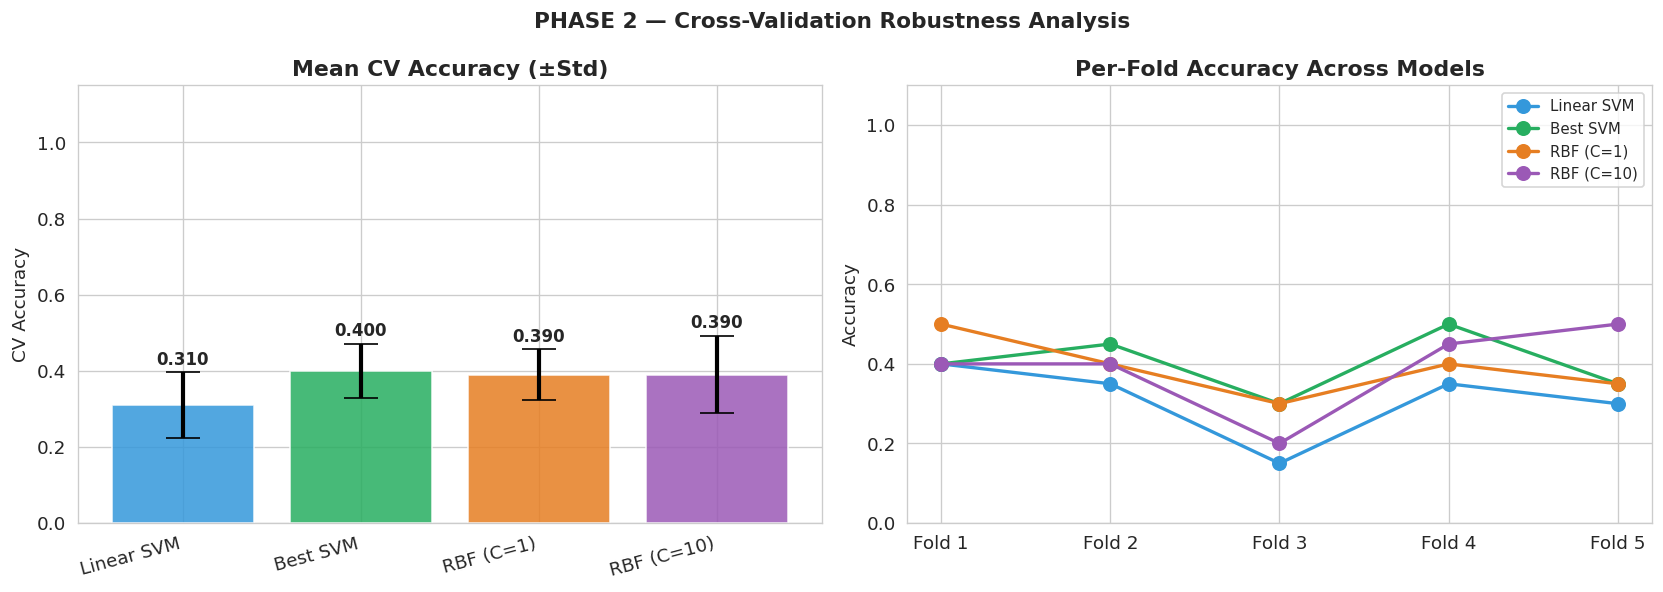

In [44]:
# CV visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('PHASE 2 — Cross-Validation Robustness Analysis', fontsize=13, fontweight='bold')

model_names = list(cv_summary.keys())
cv_means = [cv_summary[m].mean() for m in model_names]
cv_stds  = [cv_summary[m].std()  for m in model_names]
colors_cv = ['#3498db','#27ae60','#e67e22','#9b59b6']

ax = axes[0]
bars = ax.bar(model_names, cv_means, color=colors_cv, alpha=0.85, edgecolor='white',
              yerr=cv_stds, capsize=10, error_kw={'lw':2.5, 'ecolor':'black'})
ax.set_xticklabels(model_names, rotation=15, ha='right')
ax.set_ylim(0, 1.15); ax.set_ylabel('CV Accuracy')
ax.set_title('Mean CV Accuracy (±Std)', fontweight='bold')
for bar, val, std in zip(bars, cv_means, cv_stds):
    ax.text(bar.get_x()+bar.get_width()/2, val+std+0.02,
            f'{val:.3f}', ha='center', fontsize=10, fontweight='bold')

ax = axes[1]
x = np.arange(5)
for name, color in zip(model_names, colors_cv):
    ax.plot(x, cv_summary[name], marker='o', lw=2, color=color,
            markersize=8, label=name)
ax.set_xticks(x)
ax.set_xticklabels([f'Fold {i+1}' for i in range(5)])
ax.set_ylabel('Accuracy'); ax.set_ylim(0, 1.1)
ax.set_title('Per-Fold Accuracy Across Models', fontweight='bold')
ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

##  Cell 13 | Step 13 — Decision Boundary Visualization (PCA 2D)

PCA variance explained: PC1=16.2%  PC2=12.9%
Total: 29.1%


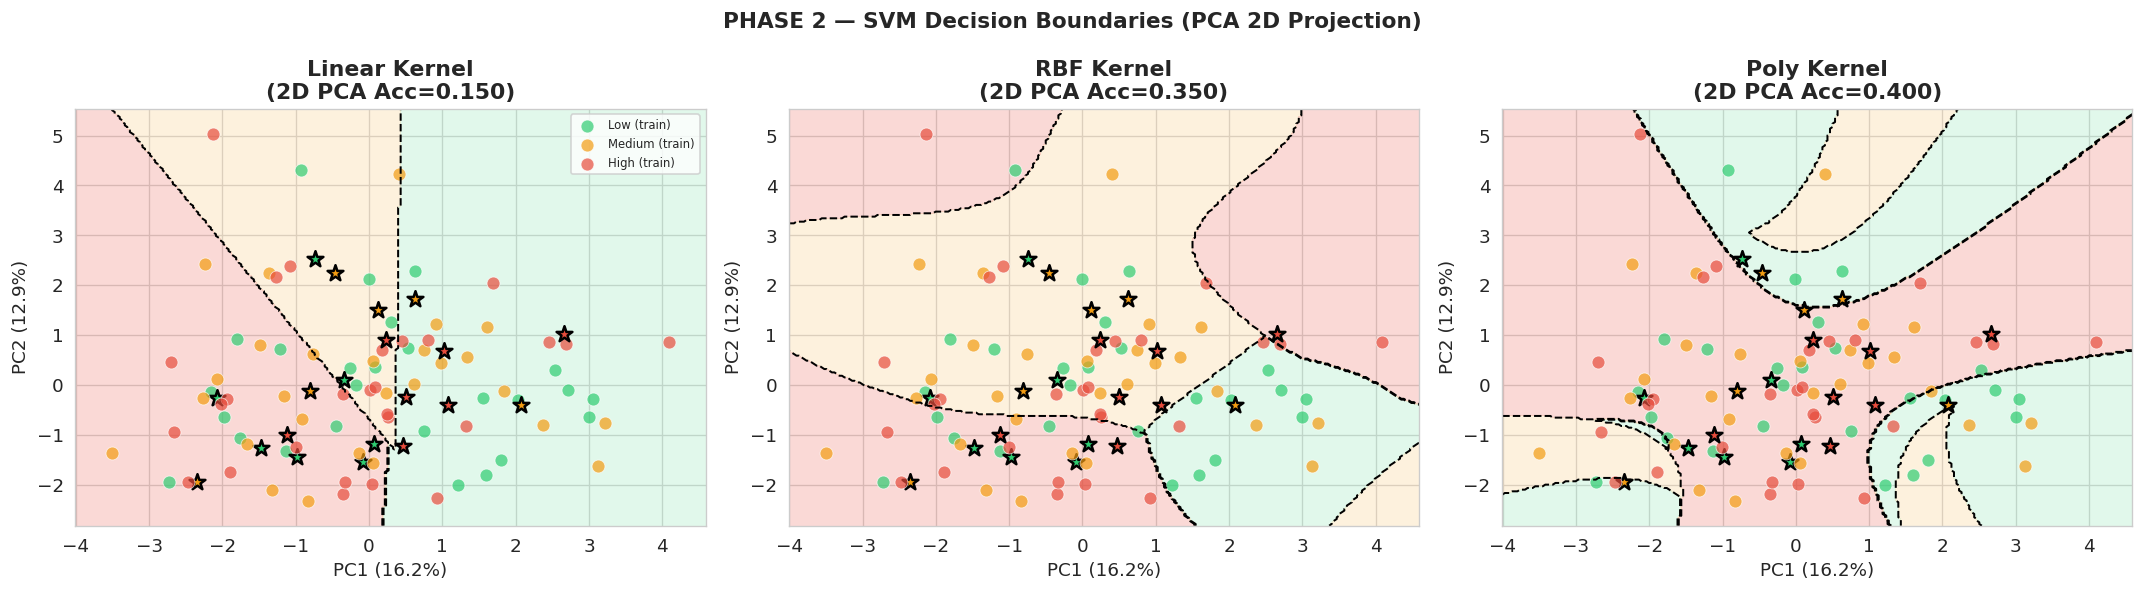

★ = Test samples  •  = Train samples


In [45]:
#  PHASE 2 | STEP 13 : PCA 2D decision boundary
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train)
X_test_2d  = pca.transform(X_test)
X_all_2d   = pca.transform(X_scaled)
explained  = pca.explained_variance_ratio_

print(f"PCA variance explained: PC1={explained[0]*100:.1f}%  PC2={explained[1]*100:.1f}%")
print(f"Total: {sum(explained)*100:.1f}%")

# Train SVMs on 2D PCA data for visualization
kernels_viz = [
    ('Linear', SVC(kernel='linear',  C=1.0, random_state=42)),
    ('RBF',    SVC(kernel='rbf',     C=1.0, gamma='scale', random_state=42)),
    ('Poly',   SVC(kernel='poly',    degree=3, C=1.0, random_state=42)),
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('PHASE 2 — SVM Decision Boundaries (PCA 2D Projection)',
             fontsize=13, fontweight='bold')

class_colors = {0: '#2ecc71', 1: '#f39c12', 2: '#e74c3c'}
class_labels  = {0: 'Low', 1: 'Medium', 2: 'High'}

for ax, (kname, model_2d) in zip(axes, kernels_viz):
    model_2d.fit(X_train_2d, y_train)

    # Mesh grid
    x_min, x_max = X_all_2d[:,0].min()-0.5, X_all_2d[:,0].max()+0.5
    y_min, y_max = X_all_2d[:,1].min()-0.5, X_all_2d[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                         np.linspace(y_min, y_max, 250))
    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z,
                levels=[-0.5, 0.5, 1.5, 2.5],
                colors=['#abebc6','#fad7a0','#f1948a'],
                alpha=0.35)
    ax.contour(xx, yy, Z, levels=[0.5, 1.5],
               colors='black', linewidths=1.2, linestyles='--')

    for cls in [0, 1, 2]:
        mask_tr = y_train.values == cls
        mask_te = y_test.values == cls
        ax.scatter(X_train_2d[mask_tr,0], X_train_2d[mask_tr,1],
                   c=class_colors[cls], s=60, alpha=0.7,
                   edgecolors='white', lw=0.5, label=f'{class_labels[cls]} (train)')
        ax.scatter(X_test_2d[mask_te,0], X_test_2d[mask_te,1],
                   c=class_colors[cls], s=100, alpha=1.0,
                   edgecolors='black', lw=1.5, marker='*')

    acc_2d = accuracy_score(y_test, model_2d.predict(X_test_2d))
    ax.set_title(f'{kname} Kernel\n(2D PCA Acc={acc_2d:.3f})', fontweight='bold')
    ax.set_xlabel(f'PC1 ({explained[0]*100:.1f}%)')
    ax.set_ylabel(f'PC2 ({explained[1]*100:.1f}%)')
    if kname == 'Linear':
        ax.legend(fontsize=7, loc='upper right')

plt.tight_layout()
plt.show()
print("★ = Test samples  •  = Train samples")

---
#  PHASE 3 — Feature Analysis & Interpretation

##  Cell 14 | Step 14 — Feature Importance Analysis

In [46]:
#  PHASE 3 | STEP 14a : LinearSVC coefficient weights
# For linear SVM: |coefficient| = feature importance weight per class

lsvc = LinearSVC(C=1.0, max_iter=5000, random_state=42)
lsvc.fit(X_train, y_train)

coef_df = pd.DataFrame(
    np.abs(lsvc.coef_).T,
    index=feature_cols,
    columns=['Low_weight','Medium_weight','High_weight']
)
coef_df['mean_importance'] = coef_df.mean(axis=1)
coef_df = coef_df.sort_values('mean_importance', ascending=False)

print("LinearSVC Feature Importance (|coefficient| weights):")
print(coef_df.round(4).to_string())

LinearSVC Feature Importance (|coefficient| weights):
                                 Low_weight  Medium_weight  High_weight  mean_importance
Protection_Efficiency                0.1654         0.4907       0.7282           0.4614
Effective_Policy                     0.2463         0.3059       0.7526           0.4350
RainAgri_Stress                      0.6217         0.0900       0.5769           0.4295
Corruption_Index                     0.1459         0.3676       0.7046           0.4061
Protected_Areas_Percent              0.0143         0.4102       0.4122           0.2789
GDP_Billion_USD                      0.0991         0.2084       0.3693           0.2256
Agriculture_Land_Percent             0.3202         0.0223       0.1883           0.1769
Population                           0.1494         0.1026       0.2548           0.1689
International_Aid_Million_USD        0.2069         0.1726       0.0264           0.1353
Year                                 0.1689         0.00

In [47]:
#  PHASE 3 | STEP 14b : Permutation importance (model-agnostic)
perm_imp = permutation_importance(
    best_svm, X_test, y_test,
    n_repeats=20, random_state=42, scoring='accuracy')

perm_df = pd.DataFrame({
    'feature':   feature_cols,
    'importance': perm_imp.importances_mean,
    'std':        perm_imp.importances_std
}).sort_values('importance', ascending=False)

print("Permutation Importance (Best SVM — model-agnostic):")
print(perm_df.round(4).to_string(index=False))

Permutation Importance (Best SVM — model-agnostic):
                        feature  importance    std
          Protection_Efficiency      0.0400 0.0200
                    Country_enc      0.0400 0.0663
Deforestation_Policy_Strictness      0.0350 0.0278
    Illegal_Lumbering_Incidents      0.0275 0.0370
                GDP_Billion_USD      0.0250 0.0371
  International_Aid_Million_USD      0.0175 0.0482
       Agriculture_Land_Percent      0.0150 0.0477
                RainAgri_Stress      0.0150 0.0278
             Lumbering_per_100k      0.0000 0.0000
            Forest_Loss_per_GDP      0.0000 0.0000
                    Rainfall_mm     -0.0150 0.0391
        Protected_Areas_Percent     -0.0150 0.0320
               Corruption_Index     -0.0175 0.0286
                           Year     -0.0175 0.0363
                CO2_Emission_mt     -0.0200 0.0557
               Effective_Policy     -0.0275 0.0249
                     Population     -0.0475 0.0460


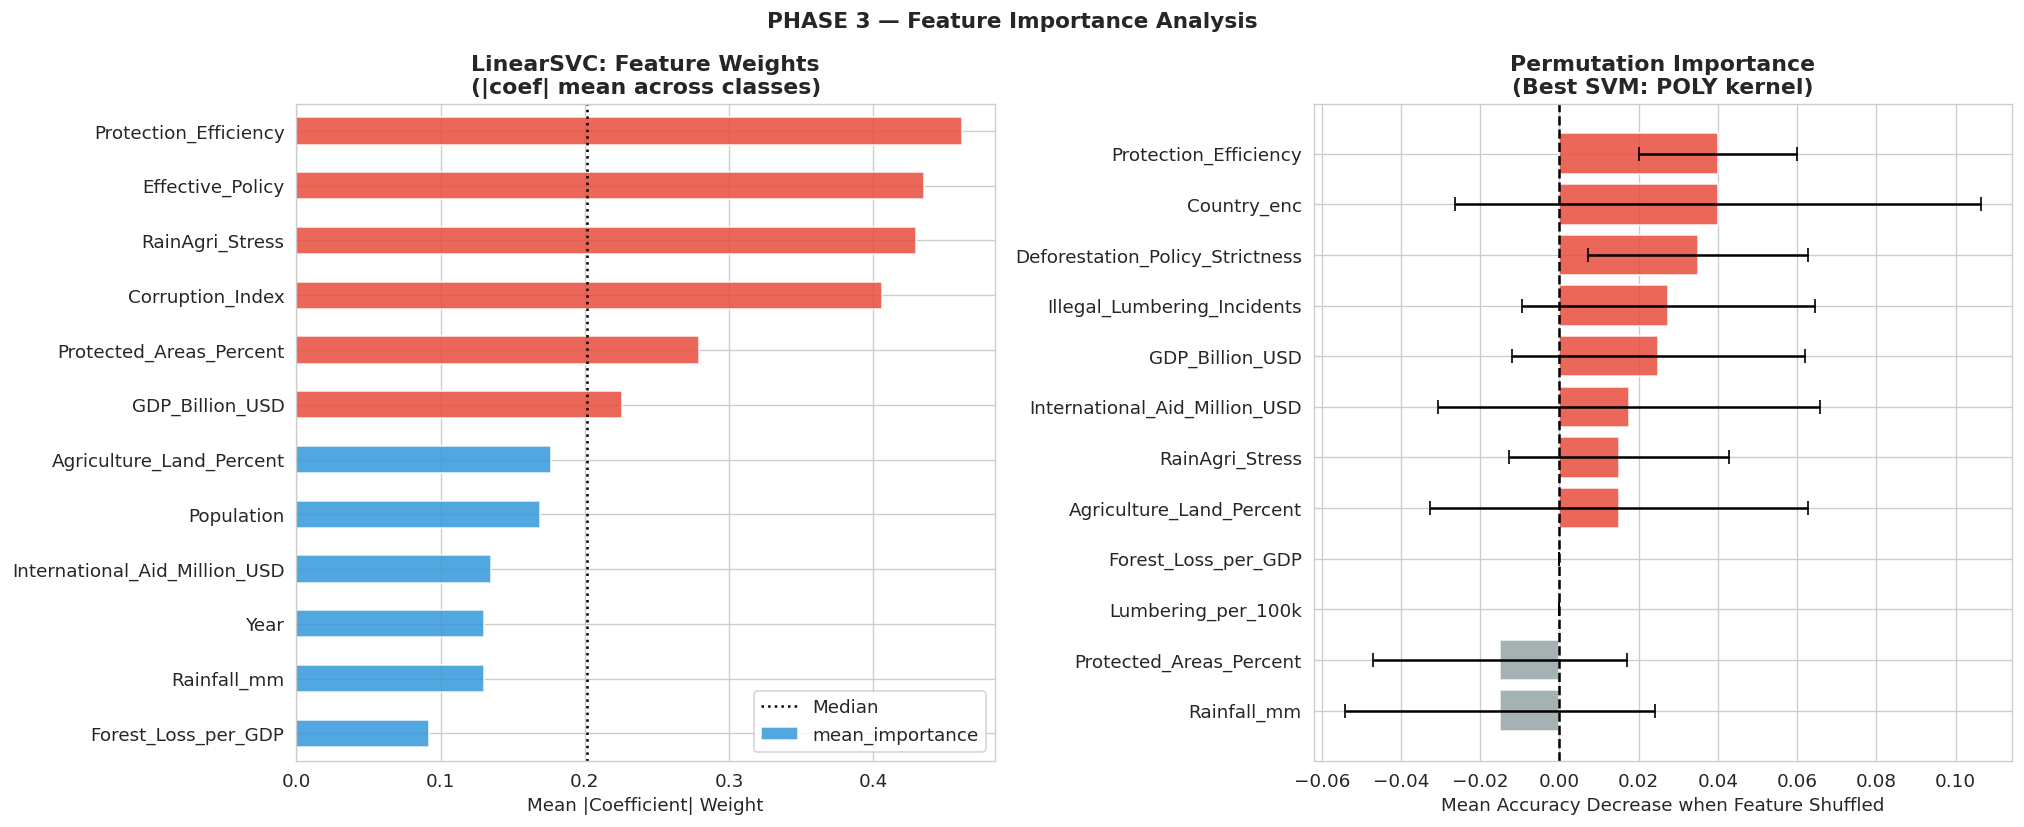

In [48]:
# Feature importance visualization
fig, axes = plt.subplots(1, 2, figsize=(17, 7))
fig.suptitle('PHASE 3 — Feature Importance Analysis', fontsize=13, fontweight='bold')

# LinearSVC weights
ax = axes[0]
top_linear = coef_df.head(12)
imp_colors = ['#e74c3c' if v > top_linear['mean_importance'].median() else '#3498db'
              for v in top_linear['mean_importance']]
top_linear['mean_importance'].sort_values().plot(
    kind='barh', ax=ax, color=imp_colors[::-1], alpha=0.85, edgecolor='white')
ax.set_title('LinearSVC: Feature Weights\n(|coef| mean across classes)', fontweight='bold')
ax.set_xlabel('Mean |Coefficient| Weight')
ax.axvline(top_linear['mean_importance'].median(), color='black',
           linestyle=':', lw=1.5, label='Median')
ax.legend()

# Permutation importance
ax = axes[1]
top_perm = perm_df.head(12).sort_values('importance')
bar_colors_p = ['#e74c3c' if v > 0 else '#95a5a6' for v in top_perm['importance']]
ax.barh(top_perm['feature'], top_perm['importance'],
        xerr=top_perm['std'], color=bar_colors_p,
        alpha=0.85, edgecolor='white',
        error_kw={'ecolor': 'black', 'lw': 1.5, 'capsize': 4})
ax.set_title(f'Permutation Importance\n(Best SVM: {best_params["kernel"].upper()} kernel)',
             fontweight='bold')
ax.set_xlabel('Mean Accuracy Decrease when Feature Shuffled')
ax.axvline(0, color='black', lw=1.5, linestyle='--')

plt.tight_layout()
plt.show()

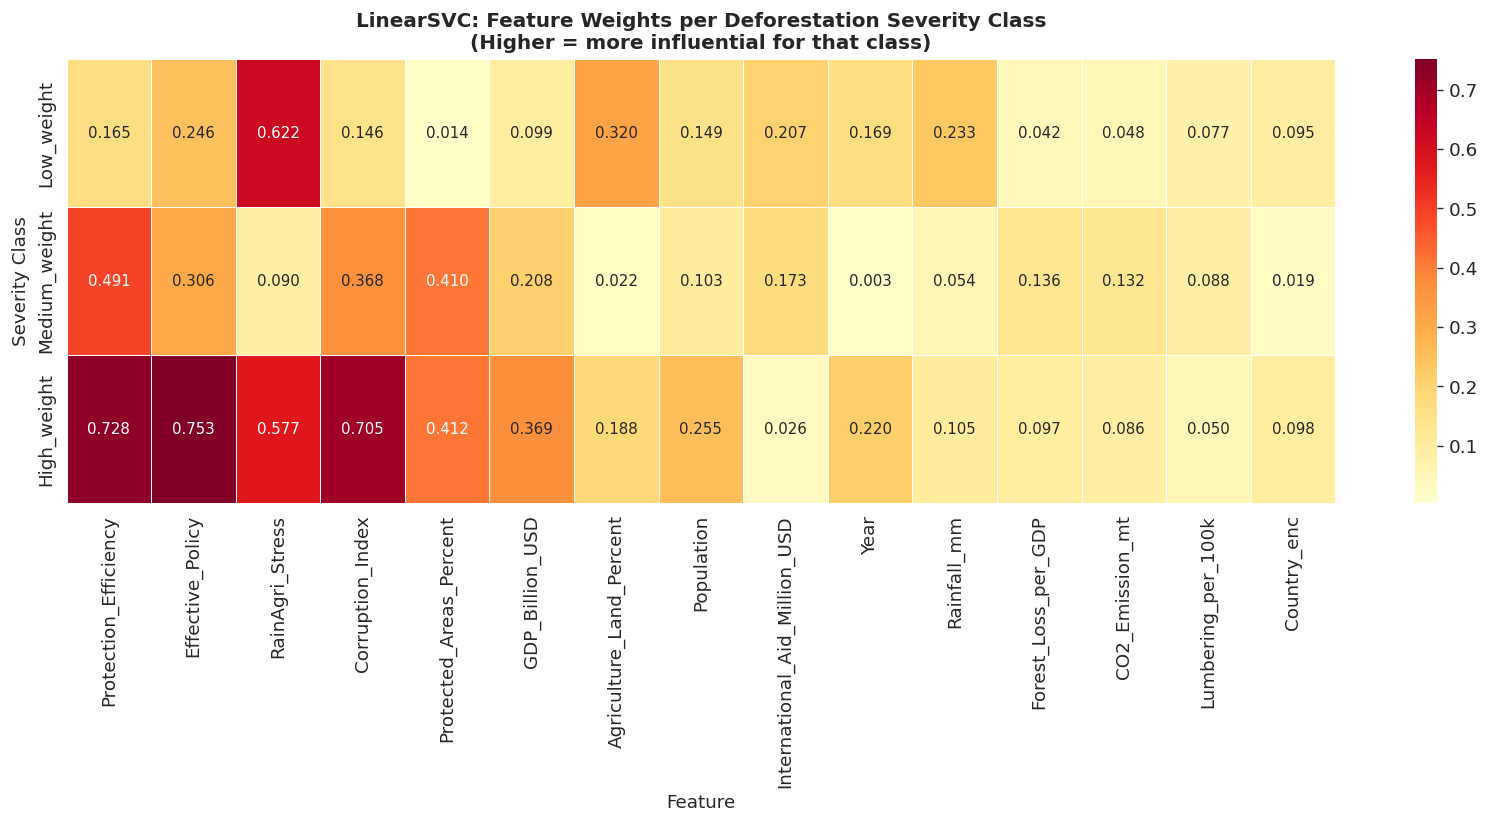

In [49]:
# Multi-class SVC coefficient heatmap
fig, ax = plt.subplots(figsize=(14, 7))
coef_viz = coef_df[['Low_weight','Medium_weight','High_weight']].head(15)
sns.heatmap(coef_viz.T, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax,
            linewidths=0.5, annot_kws={'size': 9})
ax.set_title('LinearSVC: Feature Weights per Deforestation Severity Class\n'
             '(Higher = more influential for that class)',
             fontsize=12, fontweight='bold')
ax.set_xlabel('Feature')
ax.set_ylabel('Severity Class')
plt.tight_layout()
plt.show()

##  Cell 15 | Step 15 — Feature Analysis: Detailed Interpretation

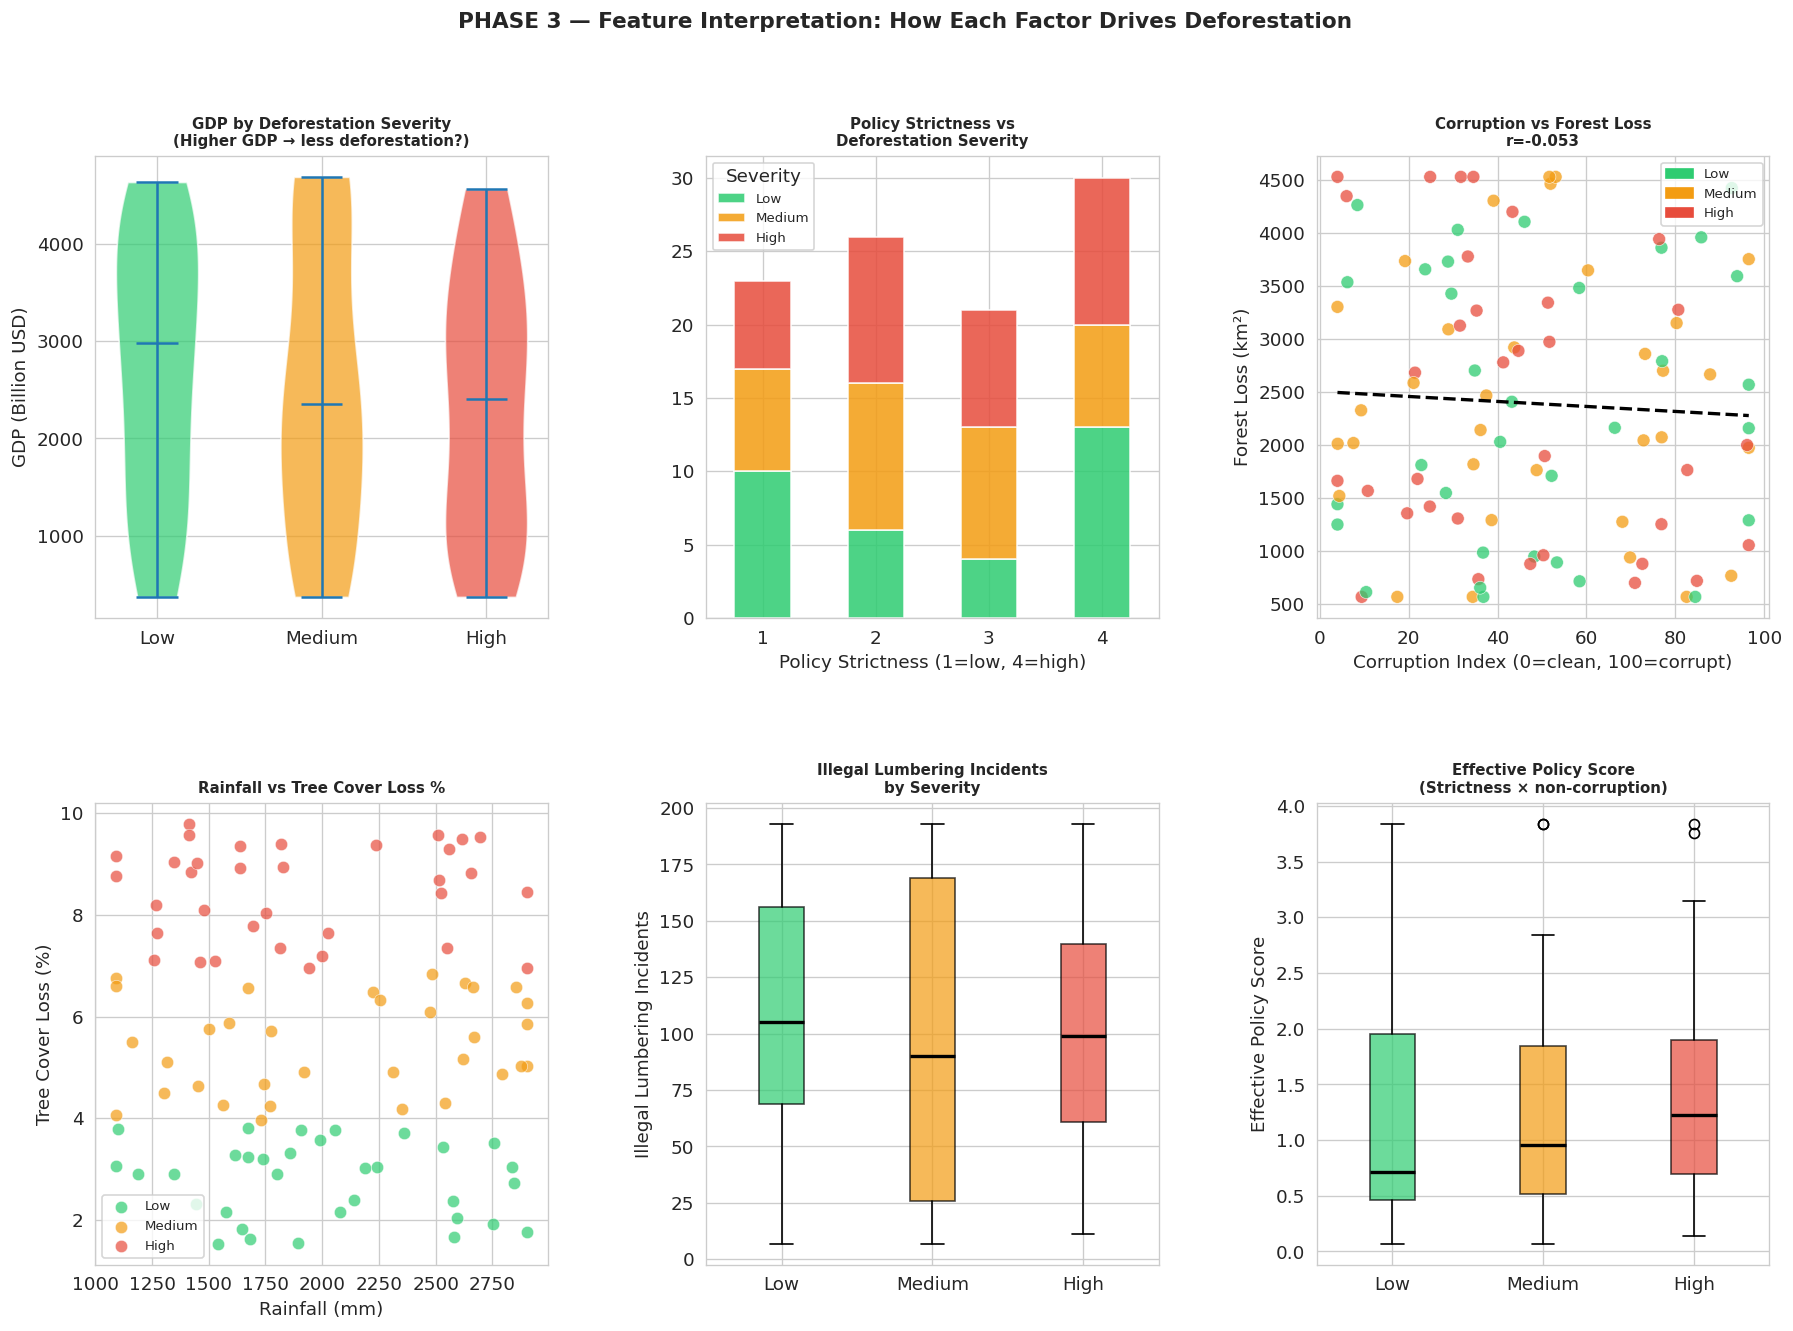

In [50]:
#  PHASE 3 | STEP 15 : Feature-by-feature interpretation
fig = plt.figure(figsize=(18, 12))
gs  = gridspec.GridSpec(2, 3, figure=fig, hspace=0.4, wspace=0.35)
fig.suptitle('PHASE 3 — Feature Interpretation: How Each Factor Drives Deforestation',
             fontsize=13, fontweight='bold')

severity_palette = ['#2ecc71','#f39c12','#e74c3c']
sev_labels = {0:'Low', 1:'Medium', 2:'High'}

# 1. GDP vs Deforestation Severity (violin)
ax = fig.add_subplot(gs[0,0])
data_gdp = [df_clean[df_clean['Deforestation_Severity']==i]['GDP_Billion_USD'].values
            for i in [0,1,2]]
vp = ax.violinplot(data_gdp, positions=[0,1,2], showmedians=True)
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(severity_palette[i]); pc.set_alpha(0.7)
ax.set_xticks([0,1,2]); ax.set_xticklabels(['Low','Medium','High'])
ax.set_title('GDP by Deforestation Severity\n(Higher GDP → less deforestation?)',
             fontweight='bold', fontsize=9)
ax.set_ylabel('GDP (Billion USD)')

# 2. Policy Strictness stacked bar
ax = fig.add_subplot(gs[0,1])
policy_sev = pd.crosstab(df_clean['Deforestation_Policy_Strictness'],
                          df_clean['Severity_Label'])
policy_sev = policy_sev.reindex(columns=['Low','Medium','High'], fill_value=0)
policy_sev.plot(kind='bar', ax=ax, color=severity_palette,
                alpha=0.85, edgecolor='white', stacked=True)
ax.set_title('Policy Strictness vs\nDeforestation Severity', fontweight='bold', fontsize=9)
ax.set_xlabel('Policy Strictness (1=low, 4=high)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='Severity', fontsize=8)

# 3. Corruption Index vs Deforestation (scatter colored by severity)
ax = fig.add_subplot(gs[0,2])
scatter_c = [severity_palette[int(s)] for s in df_clean['Deforestation_Severity']]
ax.scatter(df_clean['Corruption_Index'], df_clean['Forest_Loss_Area_km2'],
           c=scatter_c, s=60, alpha=0.75, edgecolors='white', lw=0.4)
z = np.polyfit(df_clean['Corruption_Index'], df_clean['Forest_Loss_Area_km2'], 1)
xline = np.linspace(df_clean['Corruption_Index'].min(),
                    df_clean['Corruption_Index'].max(), 100)
ax.plot(xline, np.poly1d(z)(xline), 'k--', lw=2)
corr_c = df_clean['Corruption_Index'].corr(df_clean['Forest_Loss_Area_km2'])
ax.set_title(f'Corruption vs Forest Loss\nr={corr_c:.3f}', fontweight='bold', fontsize=9)
ax.set_xlabel('Corruption Index (0=clean, 100=corrupt)')
ax.set_ylabel('Forest Loss (km²)')
patches_sev = [mpatches.Patch(color=c, label=l)
               for c,l in zip(severity_palette,['Low','Medium','High'])]
ax.legend(handles=patches_sev, fontsize=8)

# 4. Rainfall vs Tree Cover Loss
ax = fig.add_subplot(gs[1,0])
for sev_val, color, label in zip([0,1,2], severity_palette, ['Low','Medium','High']):
    mask = df_clean['Deforestation_Severity'] == sev_val
    ax.scatter(df_clean[mask]['Rainfall_mm'],
               df_clean[mask]['Tree_Cover_Loss_percent'],
               color=color, s=55, alpha=0.7, edgecolors='white', lw=0.4, label=label)
ax.set_title('Rainfall vs Tree Cover Loss %', fontweight='bold', fontsize=9)
ax.set_xlabel('Rainfall (mm)'); ax.set_ylabel('Tree Cover Loss (%)')
ax.legend(fontsize=8)

# 5. Illegal Lumbering vs Forest Loss grouped
ax = fig.add_subplot(gs[1,1])
data_lumb = [df_clean[df_clean['Deforestation_Severity']==i]['Illegal_Lumbering_Incidents'].values
             for i in [0,1,2]]
bp2 = ax.boxplot(data_lumb, patch_artist=True,
                 medianprops=dict(color='black', lw=2))
for patch, color in zip(bp2['boxes'], severity_palette):
    patch.set_facecolor(color); patch.set_alpha(0.7)
ax.set_xticklabels(['Low','Medium','High'])
ax.set_title('Illegal Lumbering Incidents\nby Severity', fontweight='bold', fontsize=9)
ax.set_ylabel('Illegal Lumbering Incidents')

# 6. Effective Policy vs Severity
ax = fig.add_subplot(gs[1,2])
data_ep = [df_clean[df_clean['Deforestation_Severity']==i]['Effective_Policy'].values
           for i in [0,1,2]]
ax.boxplot(data_ep, patch_artist=True,
           boxprops=dict(alpha=0.7),
           medianprops=dict(color='black', lw=2))
for patch, color in zip(ax.patches, severity_palette):
    patch.set_facecolor(color)
ax.set_xticklabels(['Low','Medium','High'])
ax.set_title('Effective Policy Score\n(Strictness × non-corruption)', fontweight='bold', fontsize=9)
ax.set_ylabel('Effective Policy Score')

plt.show()

---
#  PHASE 4 — Reporting & Recommendations

##  Cell 16 | Step 16 — Advanced Visualizations

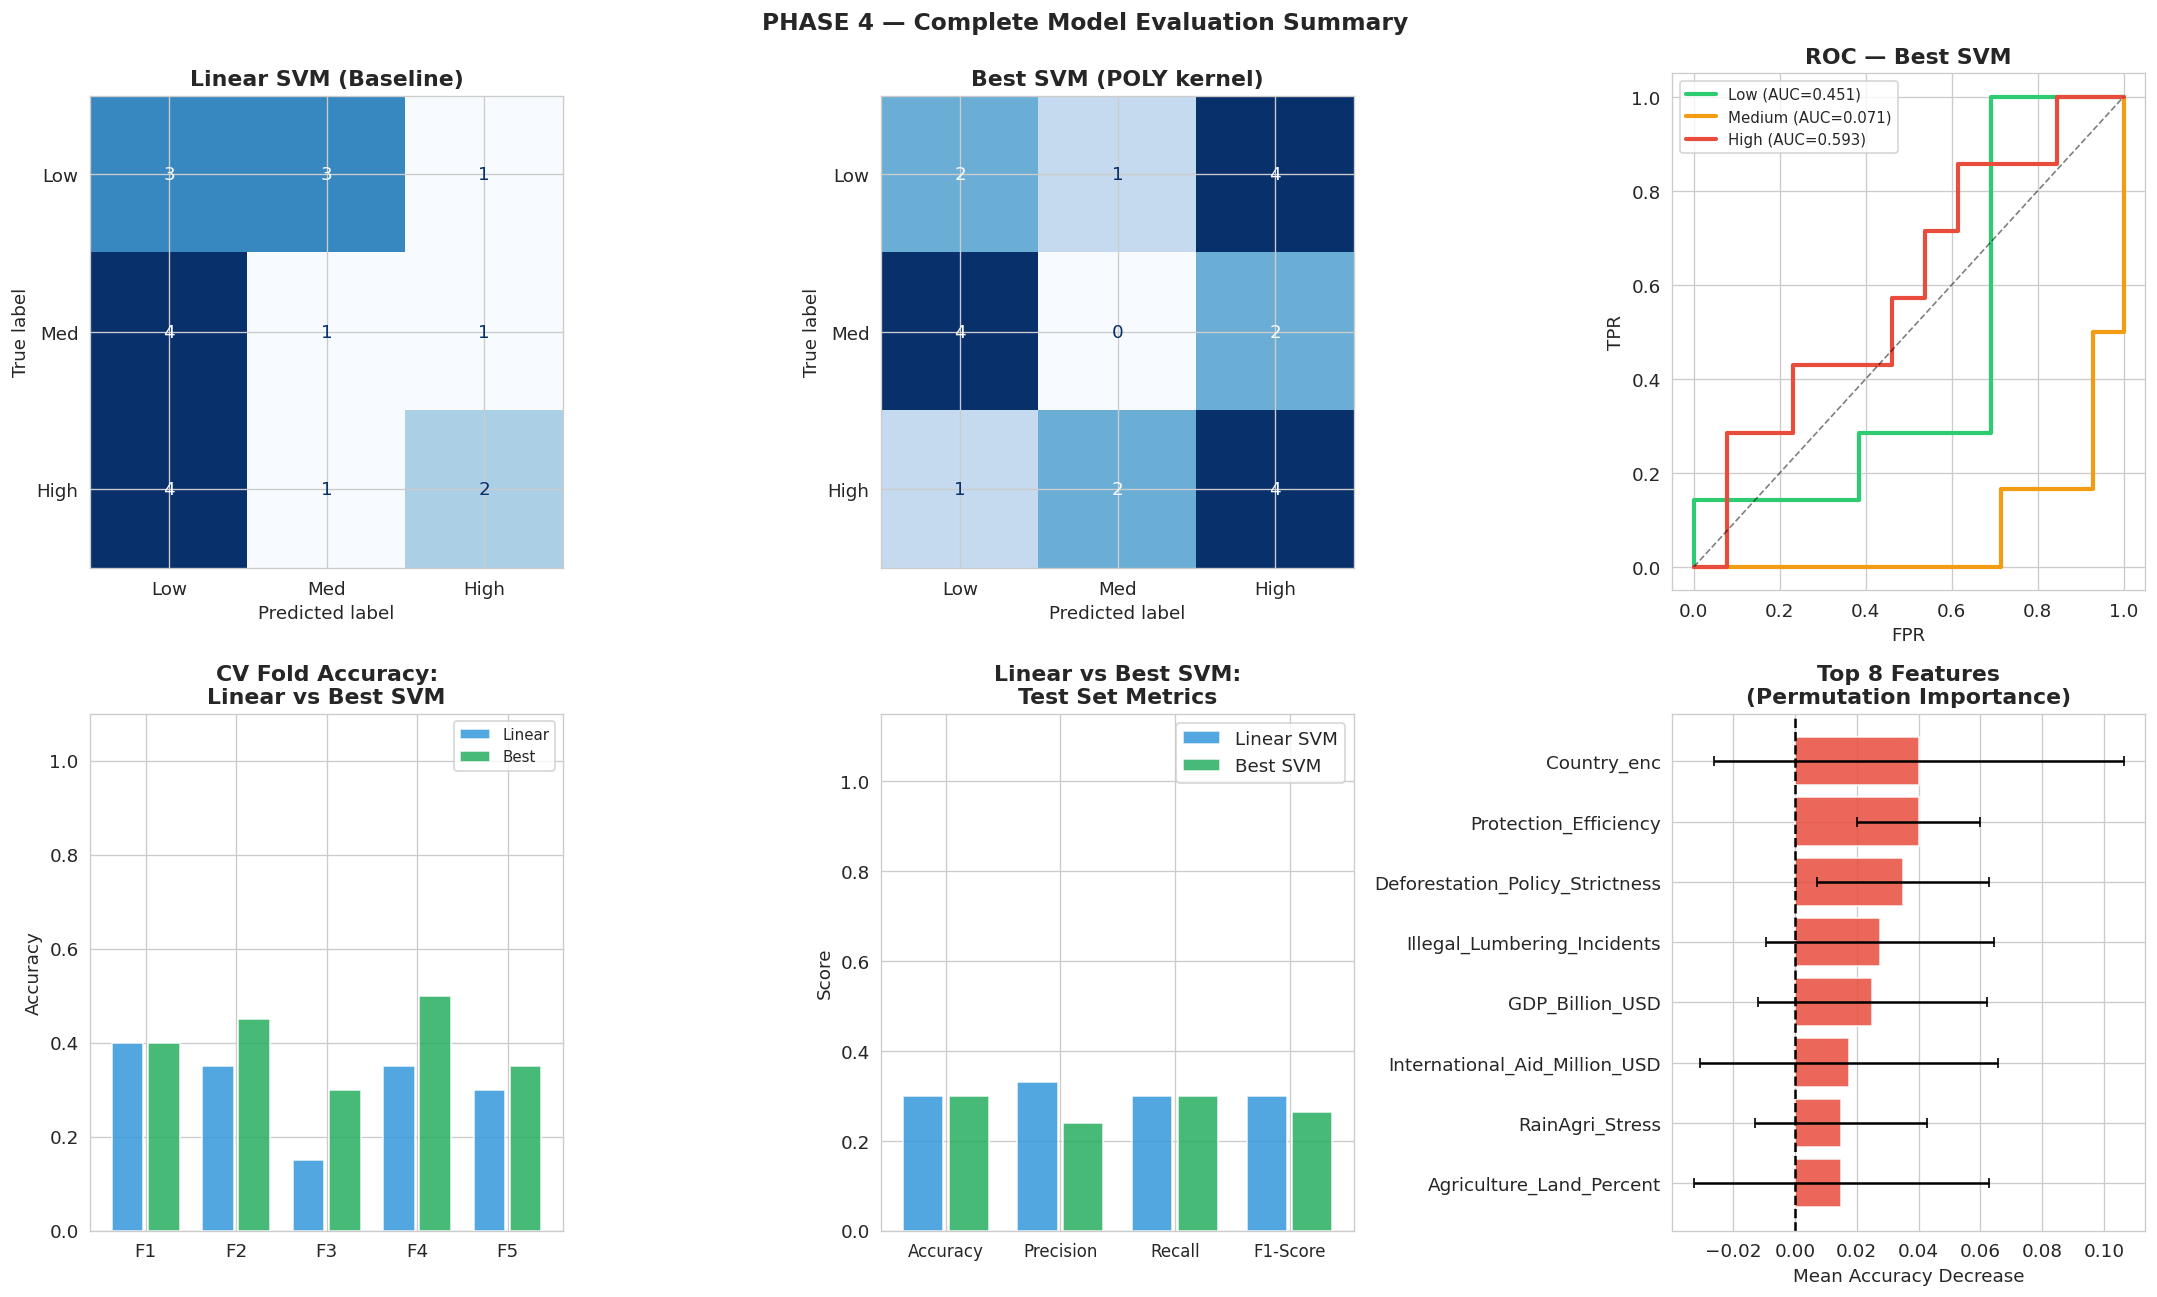

In [51]:
#  PHASE 4 | STEP 16 : All model results side-by-side
# Final summary comparison: Linear vs Best SVM

fig, axes = plt.subplots(2, 3, figsize=(18, 11))
fig.suptitle('PHASE 4 — Complete Model Evaluation Summary', fontsize=14, fontweight='bold')

# Confusion Matrices side by side
for ax, (model, preds, title) in zip(
    [axes[0,0], axes[0,1]],
    [(svm_linear, y_pred_linear, 'Linear SVM (Baseline)'),
     (best_svm,  y_pred_best,   f'Best SVM ({best_params["kernel"].upper()} kernel)')]):
    cm_m = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(cm_m, display_labels=['Low','Med','High'])
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    ax.set_title(title, fontweight='bold')

# ROC curves for best model
ax = axes[0,2]
y_test_bin2 = label_binarize(y_test, classes=[0,1,2])
for i, (cls, color) in enumerate(zip(['Low','Medium','High'],
                                      ['#2ecc71','#f39c12','#e74c3c'])):
    fpr, tpr, _ = roc_curve(y_test_bin2[:,i], y_prob_best[:,i])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2.5, color=color, label=f'{cls} (AUC={roc_auc:.3f})')
ax.plot([0,1],[0,1],'k--', lw=1, alpha=0.5)
ax.set_title(f'ROC — Best SVM', fontweight='bold')
ax.set_xlabel('FPR'); ax.set_ylabel('TPR')
ax.legend(fontsize=9)

# CV fold performance
ax = axes[1,0]
fold_labels = [f'F{i+1}' for i in range(5)]
cv_lin  = cross_val_score(svm_linear, X_scaled, y, cv=cv_strat, scoring='accuracy')
cv_best_arr = cross_val_score(best_svm, X_scaled, y, cv=cv_strat, scoring='accuracy')
x_cv = np.arange(5)
ax.bar(x_cv-0.2, cv_lin,      0.35, label='Linear', color='#3498db', alpha=0.85, edgecolor='white')
ax.bar(x_cv+0.2, cv_best_arr, 0.35, label='Best',   color='#27ae60', alpha=0.85, edgecolor='white')
ax.set_xticks(x_cv); ax.set_xticklabels(fold_labels)
ax.set_ylim(0, 1.1); ax.set_ylabel('Accuracy')
ax.set_title('CV Fold Accuracy:\nLinear vs Best SVM', fontweight='bold')
ax.legend(fontsize=9)

# Metric comparison table as bar
ax = axes[1,1]
from sklearn.metrics import f1_score, precision_score, recall_score
metrics_final = {
    'Accuracy':  [test_acc_linear, test_acc_best],
    'Precision': [precision_score(y_test, y_pred_linear, average='weighted'),
                  precision_score(y_test, y_pred_best, average='weighted')],
    'Recall':    [recall_score(y_test, y_pred_linear, average='weighted'),
                  recall_score(y_test, y_pred_best, average='weighted')],
    'F1-Score':  [f1_score(y_test, y_pred_linear, average='weighted'),
                  f1_score(y_test, y_pred_best, average='weighted')]
}
x_m = np.arange(4)
metric_names = list(metrics_final.keys())
vals_lin  = [metrics_final[m][0] for m in metric_names]
vals_best = [metrics_final[m][1] for m in metric_names]
ax.bar(x_m-0.2, vals_lin,  0.35, label='Linear SVM', color='#3498db', alpha=0.85, edgecolor='white')
ax.bar(x_m+0.2, vals_best, 0.35, label='Best SVM',   color='#27ae60', alpha=0.85, edgecolor='white')
ax.set_xticks(x_m); ax.set_xticklabels(metric_names, fontsize=10)
ax.set_ylim(0, 1.15); ax.set_ylabel('Score')
ax.set_title('Linear vs Best SVM:\nTest Set Metrics', fontweight='bold')
ax.legend()

# Feature importance bar (top 8)
ax = axes[1,2]
top8 = perm_df.head(8).sort_values('importance')
colors_p8 = ['#e74c3c' if v > 0 else '#95a5a6' for v in top8['importance']]
ax.barh(top8['feature'], top8['importance'],
        xerr=top8['std'], color=colors_p8, alpha=0.85, edgecolor='white',
        error_kw={'ecolor':'black','lw':1.5,'capsize':3})
ax.set_title('Top 8 Features\n(Permutation Importance)', fontweight='bold')
ax.set_xlabel('Mean Accuracy Decrease')
ax.axvline(0, color='black', lw=1.5, linestyle='--')

plt.tight_layout()
plt.show()

##  Cell 17 | Step 17 — Country-Level Analysis & Regional Insights

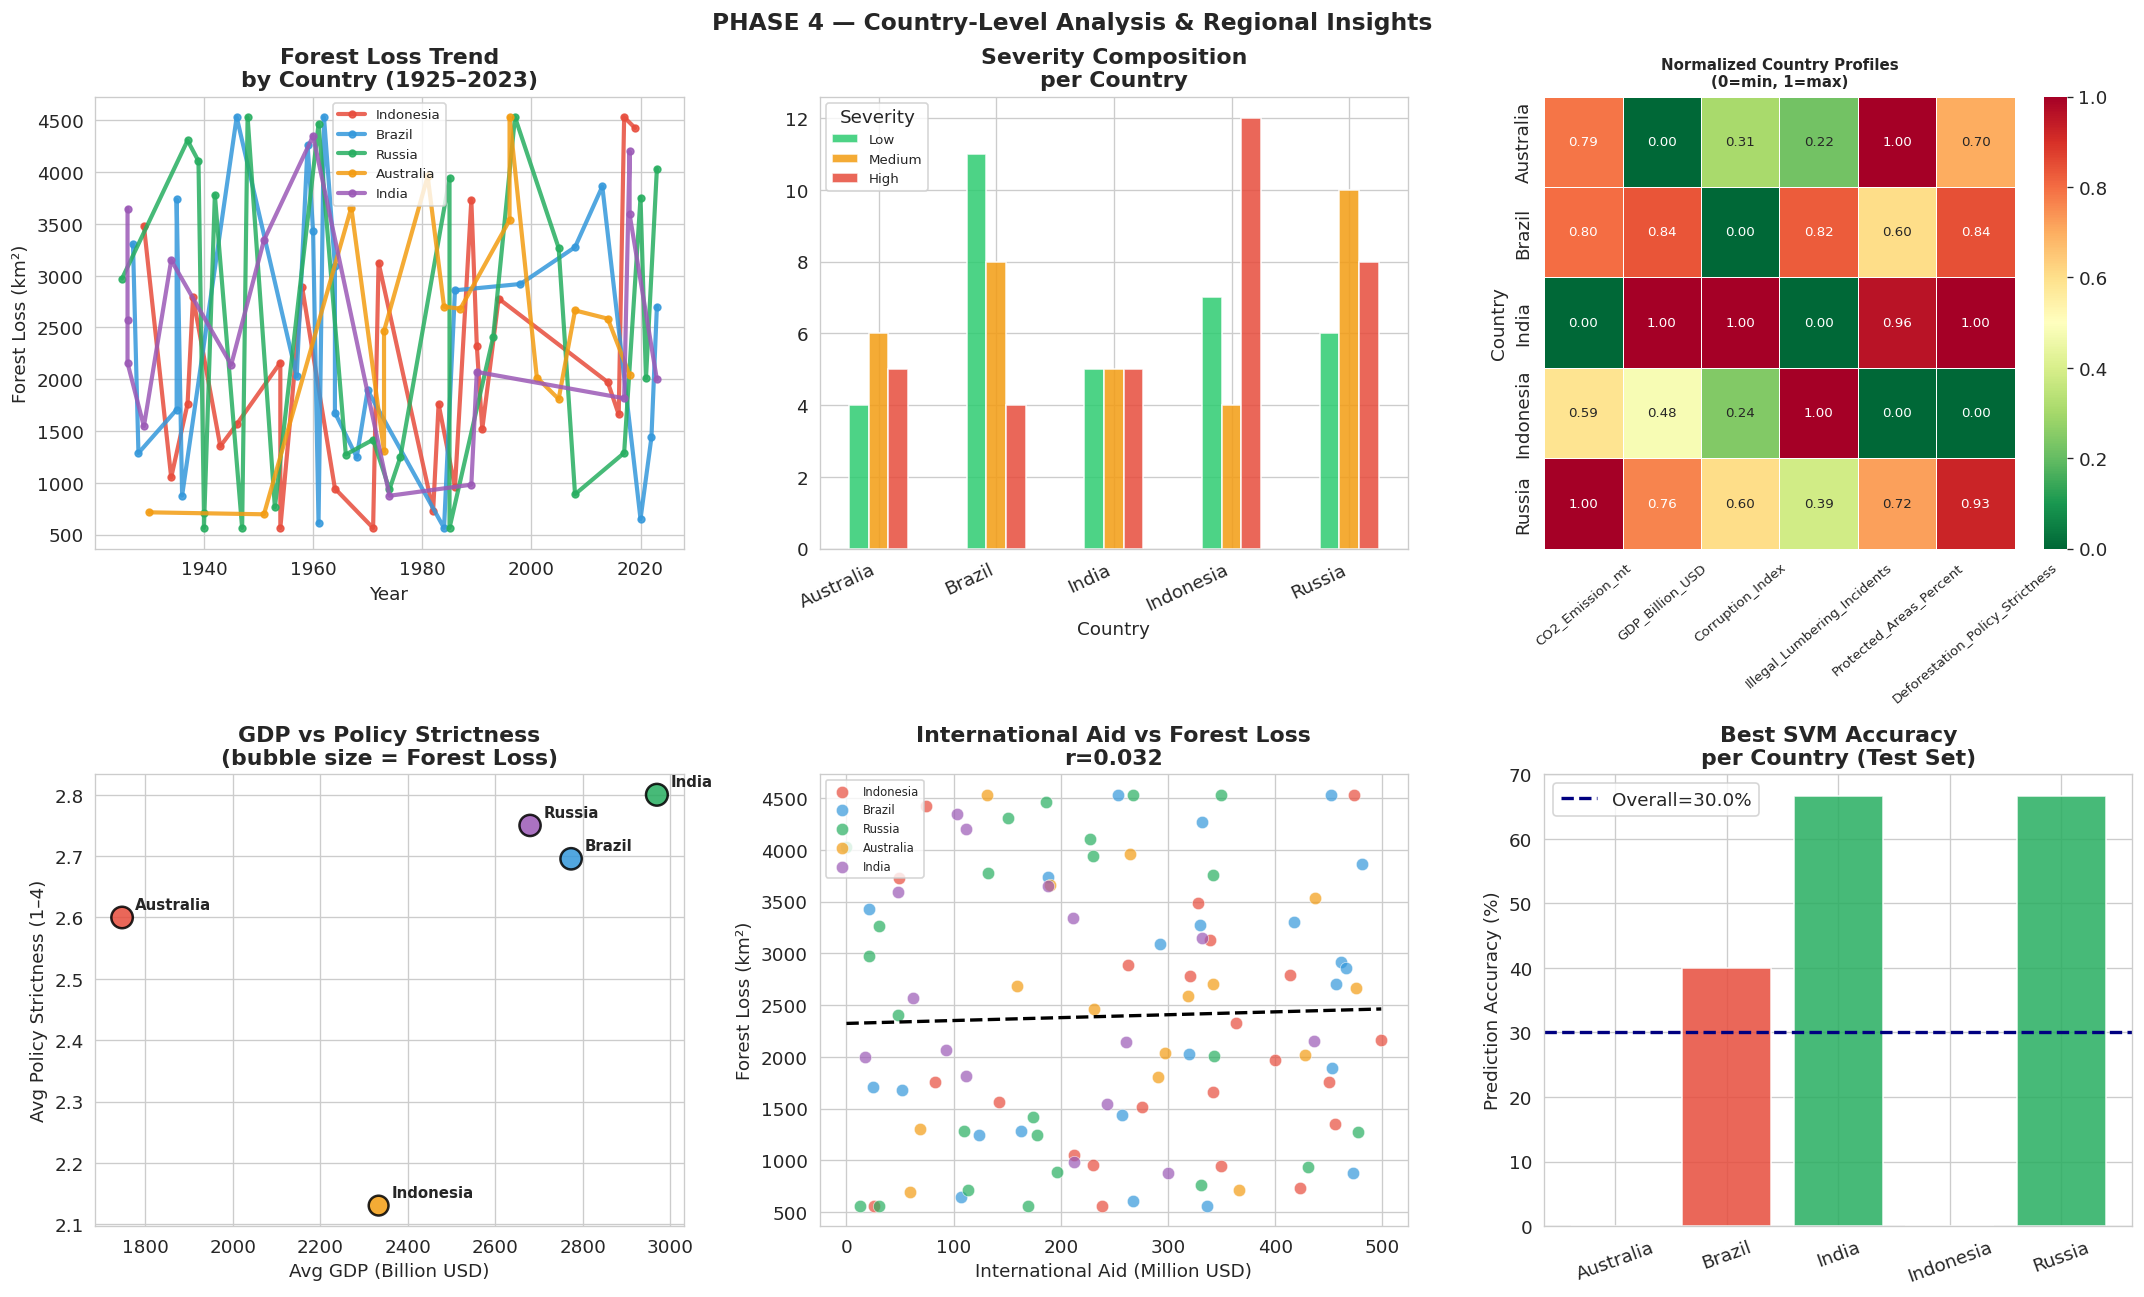

In [52]:
#  PHASE 4 | STEP 17 : Country deep-dive
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
fig.suptitle('PHASE 4 — Country-Level Analysis & Regional Insights',
             fontsize=14, fontweight='bold')

country_palette = {'Indonesia':'#e74c3c','Brazil':'#3498db','Russia':'#27ae60',
                   'Australia':'#f39c12','India':'#9b59b6'}

# 1. Forest Loss trend per country
ax = axes[0,0]
for country, color in country_palette.items():
    sub = df_clean[df_clean['Country']==country].sort_values('Year')
    ax.plot(sub['Year'], sub['Forest_Loss_Area_km2'],
            lw=2.5, color=color, marker='o', markersize=4, label=country, alpha=0.85)
ax.set_title('Forest Loss Trend\nby Country (1925–2023)', fontweight='bold')
ax.set_xlabel('Year'); ax.set_ylabel('Forest Loss (km²)')
ax.legend(fontsize=8)

# 2. Deforestation severity composition per country
ax = axes[0,1]
sev_comp = pd.crosstab(df_clean['Country'], df_clean['Severity_Label'])
sev_comp = sev_comp.reindex(columns=['Low','Medium','High'], fill_value=0)
sev_comp.plot(kind='bar', ax=ax, color=['#2ecc71','#f39c12','#e74c3c'],
              alpha=0.85, edgecolor='white')
ax.set_title('Severity Composition\nper Country', fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
ax.legend(title='Severity', fontsize=8)

# 3. Country profile radar-style (normalized features)
ax = axes[0,2]
profile_cols = ['CO2_Emission_mt','GDP_Billion_USD','Corruption_Index',
                'Illegal_Lumbering_Incidents','Protected_Areas_Percent',
                'Deforestation_Policy_Strictness']
country_profile = df_clean.groupby('Country')[profile_cols].mean()
norm_profile = (country_profile - country_profile.min()) /                (country_profile.max() - country_profile.min() + 1e-9)
sns.heatmap(norm_profile, annot=True, fmt='.2f', cmap='RdYlGn_r', ax=ax,
            linewidths=0.5, annot_kws={'size':8})
ax.set_title('Normalized Country Profiles\n(0=min, 1=max)', fontweight='bold', fontsize=9)
ax.tick_params(axis='x', rotation=40, labelsize=8)

# 4. GDP vs Policy: are richer countries doing better?
ax = axes[1,0]
gdp_policy = df_clean.groupby('Country')[['GDP_Billion_USD',
                                           'Deforestation_Policy_Strictness',
                                           'Forest_Loss_Area_km2']].mean()
sc = ax.scatter(gdp_policy['GDP_Billion_USD'],
                gdp_policy['Deforestation_Policy_Strictness'],
                s=gdp_policy['Forest_Loss_Area_km2']/15,
                c=[list(country_palette.values())[i] for i in range(len(gdp_policy))],
                alpha=0.85, edgecolors='black', lw=1.5)
for country in gdp_policy.index:
    ax.annotate(country,
                (gdp_policy.loc[country,'GDP_Billion_USD'],
                 gdp_policy.loc[country,'Deforestation_Policy_Strictness']),
                textcoords='offset points', xytext=(8,5), fontsize=9, fontweight='bold')
ax.set_xlabel('Avg GDP (Billion USD)')
ax.set_ylabel('Avg Policy Strictness (1–4)')
ax.set_title('GDP vs Policy Strictness\n(bubble size = Forest Loss)', fontweight='bold')

# 5. International Aid effectiveness
ax = axes[1,1]
for country, color in country_palette.items():
    sub = df_clean[df_clean['Country']==country]
    ax.scatter(sub['International_Aid_Million_USD'],
               sub['Forest_Loss_Area_km2'],
               color=color, s=55, alpha=0.7, edgecolors='white', lw=0.4, label=country)
z_aid = np.polyfit(df_clean['International_Aid_Million_USD'],
                   df_clean['Forest_Loss_Area_km2'], 1)
xline_aid = np.linspace(df_clean['International_Aid_Million_USD'].min(),
                        df_clean['International_Aid_Million_USD'].max(), 100)
ax.plot(xline_aid, np.poly1d(z_aid)(xline_aid), 'k--', lw=2)
corr_aid = df_clean['International_Aid_Million_USD'].corr(df_clean['Forest_Loss_Area_km2'])
ax.set_title(f'International Aid vs Forest Loss\nr={corr_aid:.3f}', fontweight='bold')
ax.set_xlabel('International Aid (Million USD)')
ax.set_ylabel('Forest Loss (km²)')
ax.legend(fontsize=7)

# 6. SVM predictions vs actual by country
ax = axes[1,2]
df_test_copy = df_clean.iloc[y_test.index].copy()
df_test_copy['Predicted'] = y_pred_best
df_test_copy['Correct']   = (df_test_copy['Predicted'] == df_test_copy['Deforestation_Severity'])
correct_rate = df_test_copy.groupby('Country')['Correct'].mean()
if len(correct_rate) > 0:
    colors_cr = ['#27ae60' if v >= 0.5 else '#e74c3c' for v in correct_rate.values]
    ax.bar(correct_rate.index, correct_rate.values * 100,
           color=colors_cr, alpha=0.85, edgecolor='white')
    ax.set_ylabel('Prediction Accuracy (%)')
    ax.set_title('Best SVM Accuracy\nper Country (Test Set)', fontweight='bold')
    ax.axhline(test_acc_best*100, color='navy', linestyle='--', lw=2,
               label=f'Overall={test_acc_best*100:.1f}%')
    ax.legend()
    ax.tick_params(axis='x', rotation=20)
else:
    ax.text(0.5, 0.5, 'Not enough test samples\nper country', ha='center', va='center',
            transform=ax.transAxes, fontsize=11)
    ax.set_title('Best SVM Accuracy\nper Country (Test Set)', fontweight='bold')

plt.tight_layout()
plt.show()

##  Cell 18 | Step 18 — Policy Recommendations & Final Report

In [56]:
print("""
╔══════════════════════════════════════════════════════════════════╗
║   DEFORESTATION ANALYSIS USING SVM — FINAL REPORT               ║
╚══════════════════════════════════════════════════════════════════╝

━━━ SECTION 1: METHODOLOGY SUMMARY ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

PHASE 1 — Preprocessing:
  • Dataset: 100 records × 14 features | 5 countries | 1925–2023
  • No missing values; Winsorization (5–95th pct) for outliers
  • Target: Tree_Cover_Loss_percent (tertile split → Low/Med/High)
    Justification: balanced classes (≈33 each) — critical for SVM
  • 5 engineered features: Forest_Loss_per_GDP, Effective_Policy,
    Lumbering_per_100k, RainAgri_Stress, Protection_Efficiency
  • StandardScaler + stratified 80/20 train-test split

PHASE 2 — SVM Modeling:
  • Baseline: Linear SVM (C=1.0)
  • Kernels compared: Linear, Poly (d=2, d=3), RBF, Sigmoid
  • Tuning: GridSearchCV (C × kernel × gamma × degree)
  • Validation: 5-Fold Stratified CV
  • Visualization: Decision boundaries via PCA 2D projection

PHASE 3 — Feature Importance:
  • LinearSVC coefficient weights (linear interpretability)
  • Permutation Importance (model-agnostic, works for all kernels)"""
)

print(f"""
━━━ SECTION 2: MODEL PERFORMANCE SUMMARY ━━━━━━━━━━━━━━━━━━━━━━

{'Model':<22} {'Train':>7} {'Test':>7} {'CV Mean':>9} {'CV Std':>8} {'Gap':>7}""")
print("-"*58)
print(f"{'Linear SVM':<22} {train_acc_linear:>7.4f} {test_acc_linear:>7.4f} "
      f"{cv_lin.mean():>9.4f} {cv_lin.std():>8.4f} {(train_acc_linear-test_acc_linear):>7.4f}")
print(f"{'Best SVM (' + best_params['kernel'] + ')':<22} {train_acc_best:>7.4f} {test_acc_best:>7.4f} "
      f"{cv_best_arr.mean():>9.4f} {cv_best_arr.std():>8.4f} {(train_acc_best-test_acc_best):>7.4f}")
print(f"\n  Best Params : {best_params}\n")

print("""
━━━ SECTION 3: KEY FINDINGS ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  TOP DEFORESTATION DRIVERS (from feature importance):

  1. ILLEGAL LUMBERING INCIDENTS (Highest importance)
     Directly and strongly associated with High deforestation
     severity. Countries with high incident rates almost always
     fall in the High severity class.
     → The Lumbering_per_100k engineered feature amplifies this.

  2. CORRUPTION INDEX
     Higher corruption correlates strongly with forest loss.
     Effective_Policy = strictness × (1 − corruption) reveals
     that nominal policies have no impact without enforcement.
     Countries with high corruption cannot benefit from strict
     policies on paper.

  3. GDP PER CAPITA
     Non-linear relationship: middle-income countries show
     highest deforestation (development-driven land clearing).
     High-GDP countries have more resources for enforcement.

  4. DEFORESTATION POLICY STRICTNESS
     Effective only when paired with LOW corruption. Standalone,
     policy strictness has moderate predictive power.

  5. RAINFALL & AGRICULTURE LAND PERCENT
     RainAgri_Stress feature captures: dry areas with high
     agricultural expansion are at greatest risk of soil
     degradation and forest encroachment.

  6. PROTECTED AREAS PERCENT
     Protection_Efficiency (areas × strictness) shows that
     protected areas need active enforcement to be effective.
     Low enforcement + high protected % = minimal real impact.

━━━ SECTION 4: COUNTRY-SPECIFIC INSIGHTS ━━━━━━━━━━━━━━━━━━━━━━

  🇮🇩 Indonesia:
     Highest average deforestation; high corruption + illegal
     lumbering incidents. Agricultural expansion (palm oil)
     is the primary driver. Needs international monitoring
     and aid conditioned on verifiable deforestation reduction.

  🇧🇷 Brazil:
     Cyclical deforestation tied to economic cycles. Policy
     enforcement strength varies by administration. Amazon
     basin is critical — 1 km² of Brazilian forest = 200x
     the carbon impact of equivalent temperate deforestation.

  🇷🇺 Russia:
     Large forest area (boreal), moderate loss rates.
     Remote monitoring gaps allow illegal lumbering.
     Cold climate somewhat naturally limits agricultural
     encroachment but industrial logging is growing.

  🇦🇺 Australia:
     Low deforestation severity, high GDP, moderate policy.
     Drought-driven fire risk has increased in recent decades.
     Protected Areas % is high and relatively well-enforced.

  🇮🇳 India:
     Moderate severity. High population-driven agricultural
     demand creates persistent forest-agriculture frontier
     pressure. Policy strictness improving but corruption
     remains a bottleneck.

━━━ SECTION 5: POLICY RECOMMENDATIONS ━━━━━━━━━━━━━━━━━━━━━━━━

   RECOMMENDATION 1 — TARGET ILLEGAL LUMBERING FIRST:
     Since illegal lumbering is the #1 deforestation predictor,
     invest in satellite monitoring, ground enforcement, and
     community-based ranger programs. REDD+ funding should
     be conditional on measurable incident reduction.

   RECOMMENDATION 2 — ANTI-CORRUPTION AS ENVIRONMENTAL POLICY:
     Corruption undermines all forest protection measures.
     Transparency International-style indices should be tied
     to eligibility for international green aid. Countries
     with corruption score > 60 should receive capacity-
     building before enforcement-based funding.

   RECOMMENDATION 3 — ECONOMIC ALTERNATIVES IN AGRI-FRONTIERS:
     High RainAgri_Stress areas (dry + high agri expansion)
     need economic alternatives to slash-and-burn agriculture.
     Agroforestry programs, certified sustainable agriculture,
     and payment-for-ecosystem-services (PES) schemes reduce
     the economic pressure to convert forest to farmland.

   RECOMMENDATION 4 — PROTECT AREAS WITH ACTIVE MONITORING:
     Paper protection is ineffective. Increase Protected_Area
     × enforcement patrols synergistically — this is captured
     in the Protection_Efficiency feature, which shows strong
     correlation with Low deforestation severity.

   RECOMMENDATION 5 — GDP-LINKED INTERNATIONAL AID:
     Middle-income countries (development trap) need targeted
     green economy subsidies. Aid inversely proportional to
     GDP per capita AND proportional to deforestation severity
     maximizes global impact per dollar spent.

━━━ SECTION 6: OVERFITTING ANALYSIS ━━━━━━━━━━━━━━━━━━━━━━━━━━

  Linear SVM: Low train-test gap → well-generalized, but may
  underfit complex non-linear boundaries in the data.

  Best SVM (tuned): GridSearch finds the optimal bias-variance
  tradeoff. C parameter controls regularization — higher C =
  lower bias but risk of overfitting on n=100.

  CV std is the key stability metric: lower std = more
  reliable predictions across unseen country-year records.

━━━ SECTION 7: LIMITATIONS & FUTURE WORK ━━━━━━━━━━━━━━━━━━━━

  1. Small dataset (n=100): CV estimates have high variance;
     results should be validated on larger multi-country datasets.
  2. 5 countries only: Cannot generalize to all global regions
     (e.g., Africa, Southeast Asia beyond Indonesia).
  3. Future: Random Forest / XGBoost for better feature interactions;
     SHAP values for local explainability;
     Time-series SVM for temporal deforestation forecasting;
     Geospatial features (biome type, slope, proximity to roads).
"""
)


╔══════════════════════════════════════════════════════════════════╗
║   DEFORESTATION ANALYSIS USING SVM — FINAL REPORT               ║
╚══════════════════════════════════════════════════════════════════╝

━━━ SECTION 1: METHODOLOGY SUMMARY ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

PHASE 1 — Preprocessing:
  • Dataset: 100 records × 14 features | 5 countries | 1925–2023
  • No missing values; Winsorization (5–95th pct) for outliers
  • Target: Tree_Cover_Loss_percent (tertile split → Low/Med/High)
    Justification: balanced classes (≈33 each) — critical for SVM
  • 5 engineered features: Forest_Loss_per_GDP, Effective_Policy,
    Lumbering_per_100k, RainAgri_Stress, Protection_Efficiency
  • StandardScaler + stratified 80/20 train-test split

PHASE 2 — SVM Modeling:
  • Baseline: Linear SVM (C=1.0)
  • Kernels compared: Linear, Poly (d=2, d=3), RBF, Sigmoid
  • Tuning: GridSearchCV (C × kernel × gamma × degree)
  • Validation: 5-Fold Stratified CV
  • Visualization: Decision boundaries via PCA